In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz
from pathlib import Path

In [4]:
segment_id = 864691135567721964
cell_type = "MC"

# Load the appropriate volume data inferface object

In [5]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [6]:
synapse_filepath = str(Path(f'./{segment_id}_synapses.csv').absolute())
synapse_filepath

'/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964_synapses.csv'

In [7]:
from datasci_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,864691135567721964,864691131808917685,126350506,postsyn,159015,163866,21373,4248
1,864691135567721964,864691131817266592,133926944,postsyn,162210,185292,22676,3708
2,864691135567721964,864691132002312394,133375145,postsyn,161962,212462,22829,7716
3,864691135567721964,864691132049643177,73532781,postsyn,128892,207884,23301,11496
4,864691135567721964,864691132146704984,167829877,postsyn,180030,206188,22035,5436
...,...,...,...,...,...,...,...,...
6348,864691135567721964,864691137197144897,82142719,presyn,121331,188683,24233,1504
6349,864691135567721964,864691137197151297,104203877,presyn,142890,172428,24107,4528
6350,864691135567721964,864691137197151297,104205943,presyn,144197,172298,24104,4228
6351,864691135567721964,864691137197153345,147748365,postsyn,170630,207400,22377,7020


In [8]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [9]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(451453, 3), faces.shape=(899885, 3))>

In [10]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [11]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [12]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [13]:
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

xvfb-run -n 9937 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_17086.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_17086_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/decimation_meshlab_25602236.mls


In [14]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
}



# Step 2: Soma Identification

In [15]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [16]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [17]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [18]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 4952 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_84288.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_84288_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_885708.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_84288.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_84288_remove_interior.off
/neurd_packages/NEURD/Applicati

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.846587]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 509 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_673459.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_673459_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_642425.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_673459.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_673459_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_642425.mls is being deleted....
Inside sph

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(550, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(550, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(234, 3), faces.shape=(462, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(234, 3), faces.shape=(462, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2045, 3), faces.shape=(4086, 3))>
xvfb-run -n 8342 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25253242.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(512, 3), faces.shape=(1020, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(512, 3), faces.shape=(1020

  0%|          | 0/4 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(1777, 3), faces.shape=(3550, 3))>
xvfb-run -n 4052 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25253242.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(445, 3), faces.shape=(886, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(445, 3), faces.shape=(886, 

  0%|          | 0/6 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(1773, 3), faces.shape=(3542, 3))>
xvfb-run -n 6285 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25253242.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(444, 3), faces.shape=(884, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(444, 3), faces.shape=(884, 

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.587199]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_226278.mls is being deleted....
Inside sphere validater: ratio_val = 108.49296057185164
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(356, 3), faces.shape=(706, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/963_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 155.50329875946045
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 7829 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_11370.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_11370_fill_holes.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/fill_holes_972479.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_11370.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_11370_fill_holes.off
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp

  0%|          | 0/12 [00:00<?, ?it/s]

Largest hole before segmentation = 60920.9840611568, after = 330805.80253342,

ratio = 5.430079760388205, difference = 269884.81847226317
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
Not need to do a second pass because already found a soma


In [19]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 1


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [20]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [21]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':155.50329566001892,
    'soma_sdfs':array([0.846587]),
  },
}



# Step 2b: Saving off pipeline products

In [22]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/products_up_to_soma_stage.pkl
File size is 16.487003 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140487246600848
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140486309484720


# Step 3: Decomposition

In [23]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
soma_mesh_list_centers = [array([607290.85387328, 771034.57102043, 909995.31979156])]
Getting Glia and Nuclei Pieces Subtracted Away 0.29810023307800293
 Splitting mesh after soma cancellation 1.1562843322753906
# of split_meshes = 4
 Containing Mesh Indices 0.04718899726867676
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 1.3828277587890625e-05
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.8890349864959717
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/166759 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.74s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 14.37602686882019
branches_touching_root = [7]
combining close nodes
combine_threshold = 700
length of Graph = 36933
After combining close endpoints max(kept_branches_idx) = 136, len(kept_branches_idx) = 134
empty_indices % = 0.0
 conflict_indices % = 0.009613302211420458


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Decomposing first pass: 25.70843243598938
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [148]
mesh_large_connectivity: 0.0002071857452392578
Finding MAP candidates connected components: 8.368492126464844e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.3365020751953125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.06766295433044434
sbv[0].reshape(-1,3) = [[606217.5 761733.  911841. ]]
closest_sk_pt_coord BEFORE = [606963.3196656  761263.13124606 911832.19073545]
current_skeleton.shape = (318, 2, 3)
node_for_stitch = 318: [606963.3196656  761263.13124606 911832.19073545]
node_for_stitch AFTER = 318: [606963.3196656  761263.13124606 9118

  0%|          | 0/134 [00:00<?, ?it/s]

332471 332472
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [610836.9 779075.4 906316.1]
Time for preparing soma vertices and root: 0.00022482872009277344
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/71107 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.48it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.2900841236114502
connecting at the root
branches_touching_root = [12]
combining close nodes
combine_threshold = 700
length of Graph = 8858
After combining close endpoints max(kept_branches_idx) = 12, len(kept_branches_idx) = 13
empty_indices % = 0.0
 conflict_indices % = 0.0034268549791638754


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Decomposing first pass: 9.067433834075928
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6897, 5359, 1959, 9757, 5276]
mesh_large_connectivity: 0.027273893356323242
Finding MAP candidates connected components: 0.00011587142944335938
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.34644031524658203
Grouping MP Sublimbs by Graph: 0.06485986709594727
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.00380706787109375
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4785 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packa

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.04722166061401367
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 19.15862798690796
Checking connected components after removing cycles
Total time for mesh KDTree = 0.23734664916992188
sbv[0].reshape(-1,3) = [[610836.9 779075.4 906316.1]]
closest_sk_pt_coord BEFORE = [609896. 779368. 907015.]
current_skeleton.shape = (1089, 2, 3)
node_for_stitch = 144: [609896. 779368. 907015.]
node_for_stitch AFTER = 144: [609896. 779368. 907015.]
possible_node_loc = [   0  180  458  533  584  606  659  862 1049 1089]
possible_node_loc AFTER = [   0  180  458  533  584  606  659  862 1049 1089]
curr_shortest_path = [144, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 169.0, 175.0, 177.0, 178.0, 180]
Current stitch point was not a br

  0%|          | 0/7 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1066, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 21.72195291519165
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1920 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_35465.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_35465_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_147544.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_35465.off
removed temporary outp

0it [00:00, ?it/s]

Total time for decomposition = 4.747942209243774
mesh_correspondence_first_pass: 4.748002052307129
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1066, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1066, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.042190919037199126
 conflict_indices % = 0.017676422319474836


  0%|          | 0/36 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 28.84335422515869
correspondence_1_to_1: 2.3695411682128906
Total time for MAP sublimb processing 28.84342622756958
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01653003692626953
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0237274169921875
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023925304412841797
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023956298828125
Do Not Need to Fix MP Decomposition 3 so just continuing
Successful mesh connectivity with type edg

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08895286223179522
 conflict_indices % = 0.005550492916908293


  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [636853.01257571 785085.62792771 883118.75733574]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.03504043126684636
 conflict_indices % = 0.0073511394266111245


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07038177914683096
 conflict_indices % = 0.005857369551012788


  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [601813.99441567 798147.85467095 910184.83951148]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05083317372150929
 conflict_indices % = 0.00731660601417353


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [613686.55938768 782177.87252093 905912.75140531]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.16990755498884286
 conflict_indices % = 0.010519604717883328


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1199602286850609
 conflict_indices % = 0.007307979120059657


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 



Time for decomp of Limb = 74.98436331748962
Number of matching vertices = 52
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/15 [00:00<?, ?it/s]

141820 141821
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [607542.6 762831.9 914440.2]
Time for preparing soma vertices and root: 0.00033545494079589844
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62628 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.0413053035736084
connecting at the root
branches_touching_root = [10]
combining close nodes
combine_threshold = 700
length of Graph = 7808
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.003281260003841475


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Decomposing first pass: 8.1435387134552
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4234, 2489, 12104, 20204, 18377]
mesh_large_connectivity: 0.055976152420043945
Finding MAP candidates connected components: 0.00010967254638671875
len(filtered_pieces) = 1
skeleton_connectivity_MP : 1.0281293392181396
Grouping MP Sublimbs by Graph: 0.0405120849609375
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006315946578979492
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 5149 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_package

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.14058756828308105
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 36.48831820487976
Checking connected components after removing cycles
Total time for mesh KDTree = 0.4316983222961426
sbv[0].reshape(-1,3) = [[607542.6 762831.9 914440.2]]
closest_sk_pt_coord BEFORE = [608089. 762641. 915117.]
current_skeleton.shape = (2567, 2, 3)
node_for_stitch = 901: [608089. 762641. 915117.]
node_for_stitch AFTER = 901: [608089. 762641. 915117.]
possible_node_loc = [  63  113  114  190  313  467  482  504  508  542  901 1246 1285 1620
 1710 1788 1818 2210 2401 2427 2434 2457 2512 2567]
possible_node_loc AFTER = [  63  113  114  190  313  467  482  504  508  542  901 1246 1285 1620
 1710 1788 1818 2210 2401 2427 2434 2457 2512 2567]
curr_shortest_path = [901]
Current stitch point was a branch or endpoint
change_status for create soma extending 

  0%|          | 0/20 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2465, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 43.83322334289551
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4711 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_77961.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_77961_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_795274.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_77961.off
removed temporary outp

0it [00:00, ?it/s]

Total time for decomposition = 10.276559352874756
mesh_correspondence_first_pass: 10.27659821510315
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (2465, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2465, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.05736134336677815
 conflict_indices % = 0.019857859531772576


  0%|          | 0/71 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 58.24681782722473
correspondence_1_to_1: 4.130521059036255
Total time for MAP sublimb processing 58.24688267707825
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01791548728942871
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02088022232055664
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02398824691772461
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [638960.43191541 756081.88315311 949436.48435953]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06694186739296962
 conflict_indices % = 0.006277129968507958


  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [613101.64672925 779430.00572369 978255.72967205]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07279835390946503
 conflict_indices % = 0.00448559670781893


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [619621.55666018 680458.4761976  936121.64033632]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09066523605150215
 conflict_indices % = 0.006667688534641324


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 92.45130157470703
Number of matching vertices = 27
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/15 [00:00<?, ?it/s]

124951 124952
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [612977.6 770342.8 904385.2]
Time for preparing soma vertices and root: 0.00020813941955566406
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50407 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.1369588375091553
connecting at the root
branches_touching_root = [18]
combining close nodes
combine_threshold = 700
length of Graph = 7941
After combining close endpoints max(kept_branches_idx) = 18, len(kept_branches_idx) = 19
empty_indices % = 0.0
 conflict_indices % = 0.0052689134108758326


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Decomposing first pass: 7.566458225250244
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [13207, 380, 1470, 1118, 9474, 6172]
mesh_large_connectivity: 0.037285804748535156
Finding MAP candidates connected components: 0.00011730194091796875
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.2756836414337158
Grouping MP Sublimbs by Graph: 0.04386448860168457
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.013359785079956055
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 5274 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_p

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.05025982856750488
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 22.704426288604736
Checking connected components after removing cycles
Total time for mesh KDTree = 0.1985158920288086
sbv[0].reshape(-1,3) = [[612977.6 770342.8 904385.2]]
closest_sk_pt_coord BEFORE = [612646. 769997. 904141.]
current_skeleton.shape = (1315, 2, 3)
node_for_stitch = 0: [612646. 769997. 904141.]
node_for_stitch AFTER = 0: [612646. 769997. 904141.]
possible_node_loc = [   0   38  107  261  344  413  437  588  716 1062 1074 1116 1148 1230
 1256 1315]
possible_node_loc AFTER = [   0   38  107  261  344  413  437  588  716 1062 1074 1116 1148 1230
 1256 1315]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [612646. 769997. 904141.]
skipping soma 0 

  0%|          | 0/11 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1267, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 25.844095945358276
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2229 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_33163.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_33163_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_929567.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_33163.off
removed temporary out

0it [00:00, ?it/s]

Total time for decomposition = 5.515310525894165
mesh_correspondence_first_pass: 5.515365123748779
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (1267, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1267, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.04613305678639892
 conflict_indices % = 0.027654693441438043


  0%|          | 0/37 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 34.082260608673096
correspondence_1_to_1: 2.709383726119995
Total time for MAP sublimb processing 34.082319498062134
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01589179039001465
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.029381513595581055
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [627667.0685465  752448.21024514 890230.26052172]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.055461146300015446
 conflict_indices % = 0.009681240022658221


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [4]
conn = [4]
winning_vertex = [629663.72297337 762149.95797074 895035.22026077]
MP_branches_with_stitch_point = [4]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07648114901256732
 conflict_indices % = 0.0035008976660682225


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07182767240111748
 conflict_indices % = 0.016394647845905014


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [4]
MP_branches_for_correspondence = [4]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 53.47357153892517
Number of matching vertices = 28
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/21 [00:00<?, ?it/s]

100589 100590
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [600586.1 766173.1 909408.5]
Time for preparing soma vertices and root: 0.00023889541625976562
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/37990 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.47it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.7127268314361572
branches_touching_root = [3]
combining close nodes
combine_threshold = 700
length of Graph = 5157
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.005621387664616928


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Decomposing first pass: 4.1439313888549805
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2984, 1368, 4761]
mesh_large_connectivity: 0.004868268966674805
Finding MAP candidates connected components: 8.177757263183594e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 1.2969279289245605
Grouping MP Sublimbs by Graph: 0.04256939888000488
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0075991153717041016
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1511 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packages/NEURD/

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02698993682861328
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.625900983810425
Checking connected components after removing cycles
Total time for mesh KDTree = 0.07318401336669922
sbv[0].reshape(-1,3) = [[600586.1 766173.1 909408.5]]
closest_sk_pt_coord BEFORE = [600193. 766332. 909631.]
current_skeleton.shape = (359, 2, 3)
node_for_stitch = 359: [600193. 766332. 909631.]
node_for_stitch AFTER = 359: [600193. 766332. 909631.]
possible_node_loc = [  0 359]
possible_node_loc AFTER = [  0 359]
curr_shortest_path = [359]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [600193. 766332. 909631.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[600193., 766332., 909631.]])}
    Total time for Fixing

0it [00:00, ?it/s]

Total time for decomposition = 1.8749773502349854
mesh_correspondence_first_pass: 1.8750078678131104
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (359, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (359, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.029847470646329418
 conflict_indices % = 0.0


  0%|          | 0/15 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 14.638237476348877
correspondence_1_to_1: 1.5438272953033447
Total time for MAP sublimb processing 14.638393878936768
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.006670236587524414
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.019744157791137695
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.024079084396362305
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [2]
conn = [2]
winning_vertex = [588932.63554664 766332.0624331  905632.93879231]
MP_branches_with_stitch_point = [2]
MAP_branches_with_sti

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.03895533852737847
 conflict_indices % = 0.0020849336113244817


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06347293361454254
 conflict_indices % = 0.002008637139700713


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [2]
MP_branches_for_correspondence = [2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [585324.42156918 761913.547466   900224.52736136]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.03442830069488313
 conflict_indices % = 0.00505369551484523


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05745689087797815
 conflict_indices % = 0.013228906147163355


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [575389.03340603 737674.04893041 895030.74819376]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07044751096208408
 conflict_indices % = 0.009350012896569513


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 34.67877221107483
Number of matching vertices = 21
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/11 [00:00<?, ?it/s]

75781 75782
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [610476.4 763192.8 908818.7]
Time for preparing soma vertices and root: 0.00028252601623535156
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/27114 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.54it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.43724894523620605
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 3511
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.003035182203468251


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Decomposing first pass: 3.6554694175720215
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [974, 2841]
mesh_large_connectivity: 0.001806020736694336
Finding MAP candidates connected components: 7.462501525878906e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.14868521690368652
Grouping MP Sublimbs by Graph: 0.02747058868408203
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.009076595306396484
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 5560 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packages/NEURD/Applicat

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.019289016723632812
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 8.192639589309692
Checking connected components after removing cycles
Total time for mesh KDTree = 0.03250455856323242
sbv[0].reshape(-1,3) = [[610476.4 763192.8 908818.7]]
closest_sk_pt_coord BEFORE = [611197. 762826. 909073.]
current_skeleton.shape = (135, 2, 3)
node_for_stitch = 0: [611197. 762826. 909073.]
node_for_stitch AFTER = 0: [611197. 762826. 909073.]
possible_node_loc = [  0 135]
possible_node_loc AFTER = [  0 135]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [611197. 762826. 909073.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[611197., 762826., 909073.]])}
    Total time for Fixing Skele

0it [00:00, ?it/s]

Total time for decomposition = 1.1254117488861084
mesh_correspondence_first_pass: 1.1254360675811768
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (135, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (135, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.04141546526867628
 conflict_indices % = 0.0


  0%|          | 0/5 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 9.931673765182495
correspondence_1_to_1: 0.32325172424316406
Total time for MAP sublimb processing 9.931757926940918
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023537635803222656
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.025669574737548828
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [625541.26641918 751740.4911113  912025.85771601]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08221313072277421
 conflict_indices % = 0.005279563608026496


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [620994.00848407 753206.95466875 910936.33342788]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07764765784114053
 conflict_indices % = 0.015784114052953158


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07208565827175388
 conflict_indices % = 0.015985522545619062


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 29.112116813659668
Number of matching vertices = 24
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

54032 54033
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [602191.8 777465.4 910208.8]
Time for preparing soma vertices and root: 0.00029540061950683594
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14121 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.16it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.27396559715270996
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1591
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 2.20146107673645
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [28180]
mesh_large_connectivity: 0.0001308917999267578
Finding MAP candidates connected components: 6.794929504394531e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.008263587951660156
Grouping MP Sublimbs by Graph: 2.5510787963867188e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.01406407356262207
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 156 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.04435157775878906
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 18.18565344810486
Checking connected components after removing cycles
Total time for mesh KDTree = 0.18741130828857422
sbv[0].reshape(-1,3) = [[602191.8 777465.4 910208.8]]
closest_sk_pt_coord BEFORE = [601895. 777399. 910091.]
current_skeleton.shape = (1271, 2, 3)
node_for_stitch = 1271: [601895. 777399. 910091.]
node_for_stitch AFTER = 1271: [601895. 777399. 910091.]
possible_node_loc = [   3   59   76  120  133  162  164  235  268  290  361  393  432  471
  483  563  615  723  944 1105 1271]
possible_node_loc AFTER = [   3   59   76  120  133  162  164  235  268  290  361  393  432  471
  483  563  615  723  944 1105 1271]
curr_shortest_path = [1271]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_

  0%|          | 0/19 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1170, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 21.473913431167603
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7115 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_12225.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_12225_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_221967.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_12225.off
removed temporary out

0it [00:00, ?it/s]

Total time for decomposition = 5.887608766555786
mesh_correspondence_first_pass: 5.887654781341553
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (1170, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1170, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.05379701916252661
 conflict_indices % = 0.0


  0%|          | 0/36 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 29.057420253753662
correspondence_1_to_1: 1.6817097663879395
Total time for MAP sublimb processing 29.057482719421387
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 31.594175815582275
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

28179 28180
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 423.53628396987915


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(400, 3), faces.shape=(796, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.88it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04005265235900879
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 126
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [137.6027276]
width_median= 137.60272760064538
segment_widths_median = [137.6027276]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.95it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.14069700241088867
branches_touching_root = [1]


combining close nodes
combine_threshold = 1300
length of Graph = 168
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.03391959798994975


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [141.09348448 136.45032401 214.36723855]
width_median= 148.40660298823605
segment_widths_median = [141.09348448 136.45032401 214.36723855]
Using the axon parameters
Decomposing first pass: 0.12482738494873047
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.57763671875e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.457069396972656e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.3159775733947754
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

795 796
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.6084210872650146
Floating 1: <trimesh.Trimesh(vertices.shape=(63, 3), faces.shape=(120, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 84.26it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029977083206176758
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [151.68215041]
width_median= 151.6821504120202
segment_widths_median = [151.68215041]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.51it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07635283470153809
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [151.67572211]
width_median= 151.67572210800284
segment_widths_median = [151.67572211]
Using the axon parameters
Decomposing first pass: 0.04615306854248047
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.933906555175781e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.504753112792969e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.15465283393859863
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

119 120
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2655062675476074
Floating 2: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(115, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 69.01it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.032590389251708984
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [316.68647255]
width_median= 316.68647254640734
segment_widths_median = [316.68647255]
Decomposing first pass: 0.04984641075134277
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.457069396972656e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9087066650390625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08380913734436035


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15075993537902832


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.04056333895694271
 conflict_indices % = 0.0036675713342624516


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 4
Total time for stitching floating pieces = 11.40610408782959
Total time for Concept Networks = 13.52366328239441
Total time for all mesh and skeletonization decomp = 457.6690618991852
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 3621 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_496819.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_496819_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_531710.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_496819.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_te

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 74



  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 80



  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 40



  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 62



  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 77



  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 39



  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 56



  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 47



  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 79



  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 85



  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 51



  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 144



  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 92



  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 120



  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 123



  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 35



  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 191



  0%|          | 0/191 [00:00<?, ?it/s]

  0%|          | 0/191 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 40



  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 115



  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 121



  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 88



  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 55



  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 64



  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 58



  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 134



  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 125



  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 97



  0%|          | 0/97 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [24]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [25]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [26]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':155.50329566001892,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Saving off neuron

In [27]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.18773126602172852
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.9581153392791748
Total time for limb_meshes compression = 1.3692262172698975
    Starting Limb Correspondence Compression


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 23.01051163673401
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140487246600848
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140486309484720
Total time for compression = 77.9358582496643


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964---
saved neuron filepath = 864691135567721964


'864691135567721964.pbz2'

# Reloading the Neuron

In [28]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    #mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [29]:
print(neuron_obj_rec.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':155.50329566001892,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

In [30]:
neuron_obj = neuron_obj_rec

# Step 4A: Multi Soma Split Suggestions

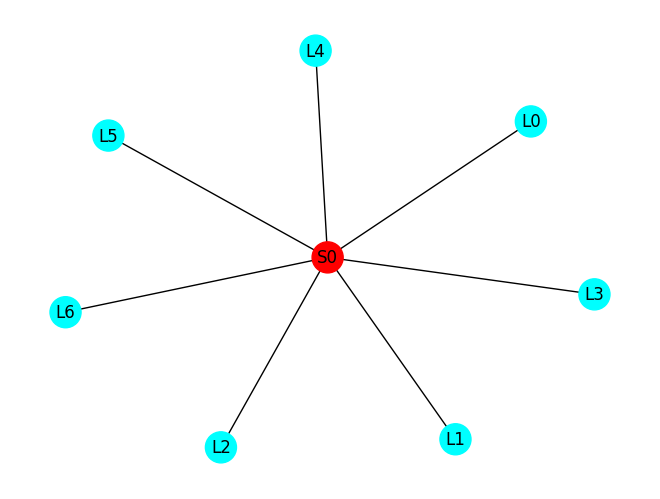

In [31]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [32]:
multi_soma_split_parameters = dict()

In [33]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [34]:
neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

# Step 4B: Multi Soma Split Execution

In [35]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [36]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':155.50329566001892,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Step 5: Cell Typing

In [37]:
from neurd import neuron_pipeline_utils as npu

In [38]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 4


Number of segments: 5


Number of segments: 2


Number of segments: 2


Number of segme

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:21<00:00, 21.23s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 22.943386554718018
branches_touching_root = [15]
combining close nodes
combine_threshold = 1300
length of Graph = 47118
After combining close endpoints max(kept_branches_idx) = 490, len(kept_branches_idx) = 449
empty_indices % = 0.0
 conflict_indices % = 0.028083451415478307
Decomposing first pass: 80.02659702301025
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.86102294921875e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.5272369384765625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.004038572311401367
sbv[0].reshape(-1,3) = [[606217.5 761733.  911841. ]]
closest_sk_pt_coord BEFORE = [607085.45171222 761489.43217667 911789.29988978]
current

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 187.28it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.015257835388183594
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
Decomposing first pass: 0.02558422088623047
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.0967254638671875e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.002716064453125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.04193997383117676
Removed 0 skeletal branches
119 120
For marked faces: None
empty_indices % = 0.0


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11615872383117676
concept_network_dict = {0: [<datasci_tools.networkx_utils.GraphOrderedEdges object at 0x7fc3ce2f7af0>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [607212.4 761727.8 911846.2]---------
Starting_edge inside branches_to_conept = [[606459.1 760534.7 912002.4]
 [607212.4 761727.8 911846.2]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [435]
printing out current edge:
[[607212.4 761727.8 911846.2]
 [606459.1 760534.7 912002.4]]
edge_endpoints_to_process was empty so exiting loop after 450 iterations
starting_node in concept map (that should match the starting edge) = 440
Total time for branches to concept conversion = 3.9735500812530518

Done generating concept network 



Number of segments: 7


Number of segments: 6


Number of segments: 24


Number of segments: 2


Number of segments: 3


Number of segments: 6


Number of segments: 6


Number of segm

In [39]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 1.4679800754465162
syn_density_head = 0.09313468756609317
syn_density_neck = 0.007286046986463072
syn_density_shaft = 1.3257437668846936
sk_length_synapse_density = 3156718.594147454
About to do spine_density stats
postsyn_limb_branch = {'L1': array([ 0,  1,  7, 10, 11, 12, 14]), 'L2': array([ 0,  4,  8,  9, 12, 13, 14]), 'L3': array([ 0, 11, 12]), 'L4': array([0, 1, 2, 4]), 'L5': array([2, 4]), 'L6': array([0])}
sk_length = 2599997.788035156
# of spines = 267
Density = 0.10269239505844907
spine_density = 0.10269239505844907 (multiplier = 1000)
sk_length spine density = 2599997.788035156
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = inhibitory, pred_class_label = inhibitory
Total time for e/i calculations = 0.22747516632080078
baylor_e_i = inhibitory

*****Using v7 INHIBITORY Filters!!!


Current

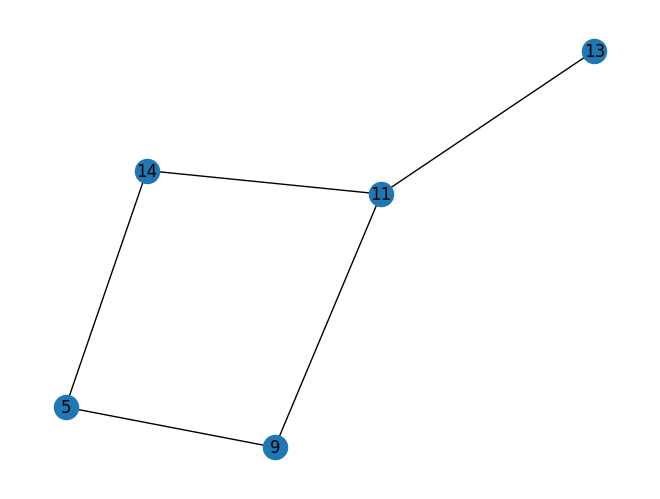

Performing global features query
Done with edge_df: 0.0009415149688720703
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   30.917788               0.297333              0.000228   
1   9   5     62.37   21.874290               0.173801              0.000000   
2  11  13     27.84   30.321878               0.414993              0.000228   
3  11  14     56.20    3.728196               0.051025              0.000082   
4  14   5     48.78   49.063882               0.389835              0.000146   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                0                       None                          None  
2                1                       None                          None  
3       

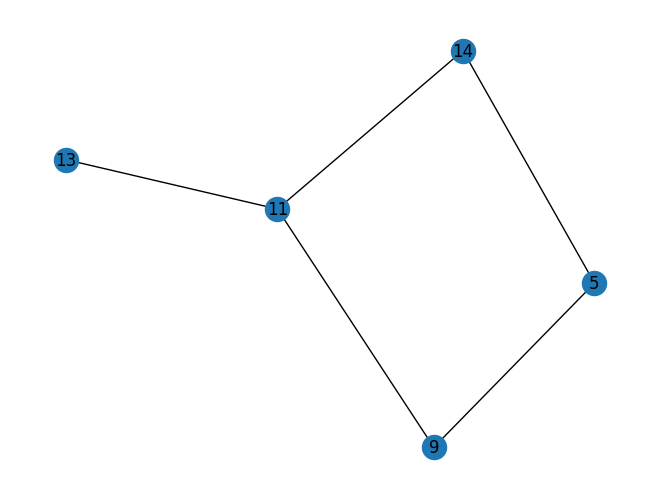

Performing node features query
Done with edge_df: 0.0009000301361083984
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   30.917788               0.297333              0.000228   
1   9   5     62.37   21.874290               0.173801              0.000000   
2  11  13     27.84   30.321878               0.414993              0.000228   
3  11  14     56.20    3.728196               0.051025              0.000082   
4  14   5     48.78   49.063882               0.389835              0.000146   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                0                       None                          None   
2                1                       None                          None   
3       

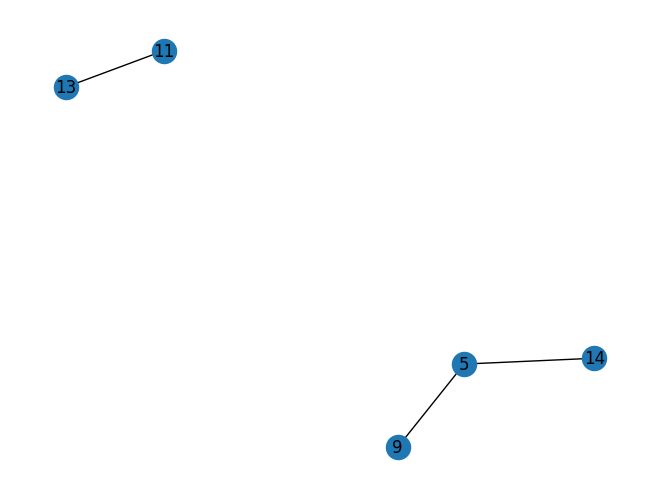

for upstream node 5, winning_node = None, error_branches = [ 9 11 13 14]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2295.567951631285 but max skip distance was 2295.567951631285
Current node skip distance was 1391.5426047741767 but max skip distance was 1391.5426047741767
Current node skip distance was 1599.932248665701 but max skip distance was 1599.932248665701
Current node skip distance was 1546.9734240260361 but max skip distance was 1546.9734240260361
Current node skip distance was 1471.108130620547 but max skip distance was 1779.546800781588
Current node skip distance was 1344.7669739067755 but max skip distance was 1344.7669739067755
Current node skip distance was 1486.6422825420861 but max skip distance was 1486.6422825420861
Current node skip distance was 1817.724537011968 but max skip distance was 2295.567951631285
Current node skip distance was 1501.0959360356467 but max skip distance was 1501.09593

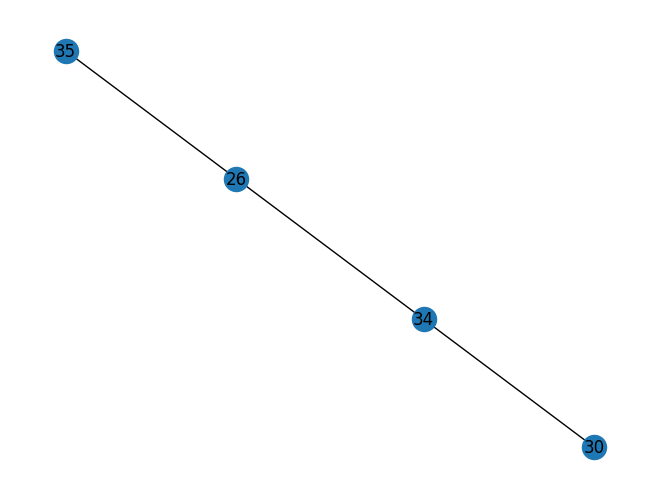

Performing global features query
Done with edge_df: 0.0008475780487060547
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  34     59.58   14.471283               0.173202              0.000283   
1  26  35     25.87   19.100212               0.186068              0.000099   
2  30  34     49.14    3.678044               0.038985              0.000283   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       True                          None  
1                2                      False                          None  
2                3                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   19.100212               0.186068              

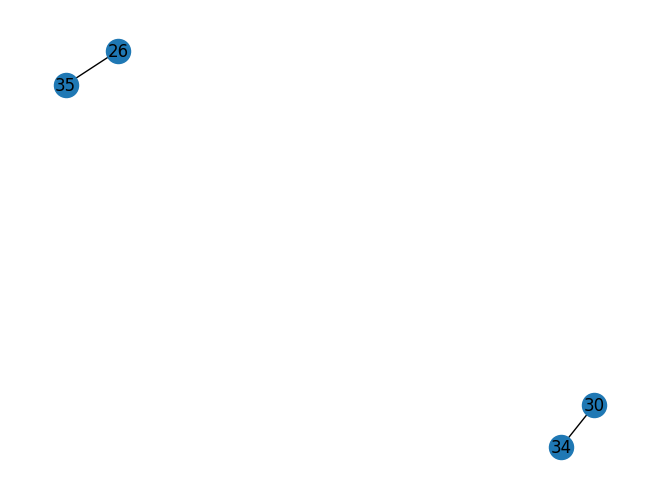

Performing node features query
Done with edge_df: 0.0028498172760009766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   19.100212               0.186068              0.000099   
1  30  34     49.14    3.678044               0.038985              0.000283   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                      False                          None   
1                3                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   19.100212               0.186068              0.000099   
1  30  34     49.14    3.678044               0.038985             

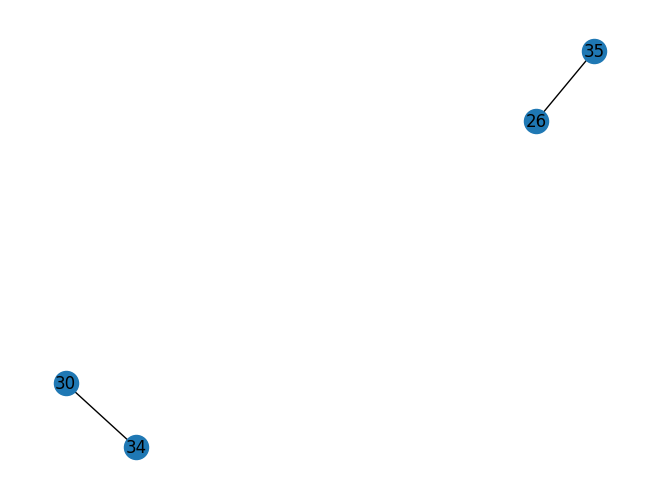

for upstream node 35, winning_node = 26, error_branches = [30 34]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (83.5516809667269) less than width_min(250)
Current node skip distance was 1684.4588526661273 but max skip distance was 1684.4588526661273
Current node skip distance was 1596.5980444725747 but max skip distance was 1687.839175191355
Current node skip distance was 1465.4945829272474 but max skip distance was 1465.4945829272474
Current node skip distance was 1455.9870844894756 but max skip distance was 1455.9870844894756
Current node skip distance was 1481.2995057656967 but max skip distance was 1971.3416685967604
Current node skip distance was 1794.129796285692 but max skip distance was 1794.129796285692
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0020596981048583984
Performing Edge Query
After edge filter, # of rows

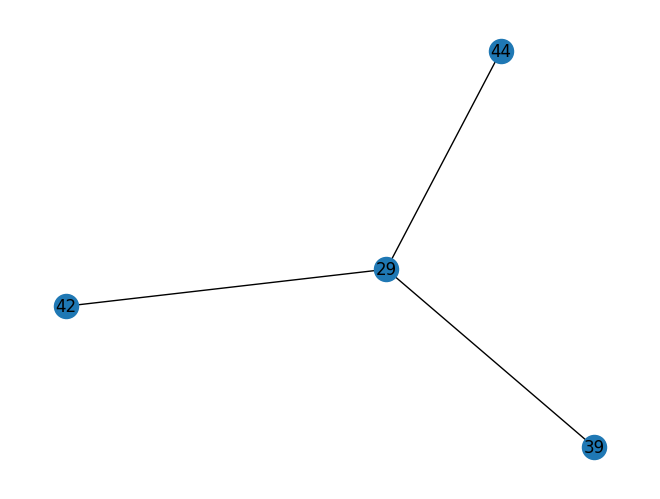

Performing global features query
Done with edge_df: 0.0013954639434814453
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17   41.589871               0.503021              0.000000   
1  29  42     38.61   13.243354               0.160176              0.000033   
2  29  44     33.11   67.910897               0.450962              0.000352   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                1                       None                          None  
2                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17   41.589871               0.503021              

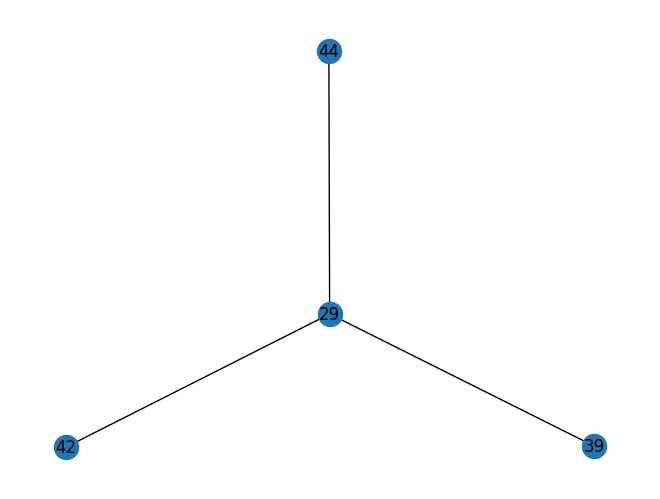

Performing node features query
Done with edge_df: 0.0011150836944580078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17   41.589871               0.503021              0.000000   
1  29  42     38.61   13.243354               0.160176              0.000033   
2  29  44     33.11   67.910897               0.450962              0.000352   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                1                       None                          None   
2                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_di

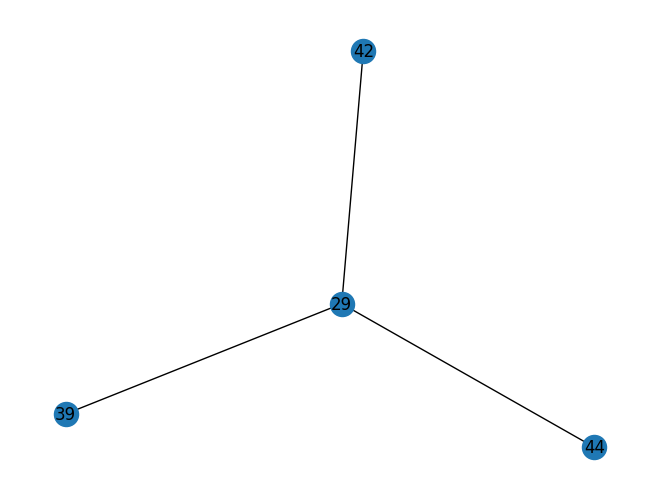

for upstream node 44, winning_node = None, error_branches = [29 39 42]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1407.2364002485333 but max skip distance was 1407.2364002485333
Current node skip distance was 1437.4230453052987 but max skip distance was 1437.4230453052987
Current node skip distance was 1697.3244725786685 but max skip distance was 1885.568734036609
Current node skip distance was 1533.0819962936434 but max skip distance was 1533.0819962936434
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1759.9527762328148 but max skip distance was 1759.9527762328148
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1983.9878891513208 but max skip distance was 2016.3691093054942
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1490.7851567970627 but max skip d

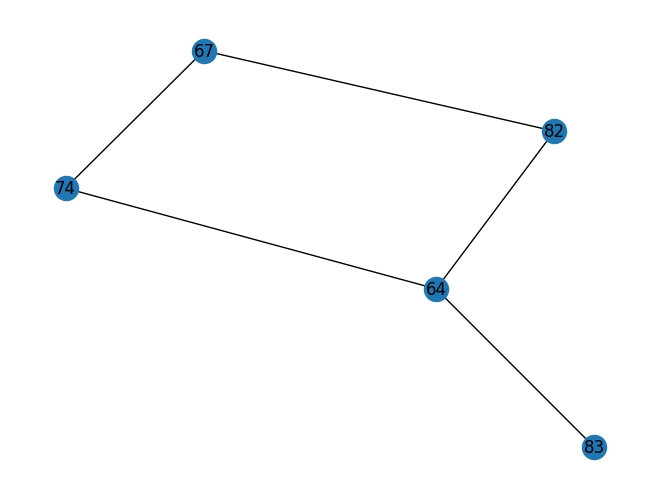

Performing global features query
Done with edge_df: 0.0012080669403076172
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  64  82     27.25   18.289527               0.319367              0.000162   
1  64  83     32.69   13.374715               0.233546              0.000251   
2  64  74     36.69    6.557693               0.102744              0.000251   
3  67  82     25.44    1.771389               0.022907              0.000015   
4  67  74     26.27   13.503222               0.211564              0.000074   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                4                       None                          None  
1                2                       None                          None  
2                2                       None                          None  
3       

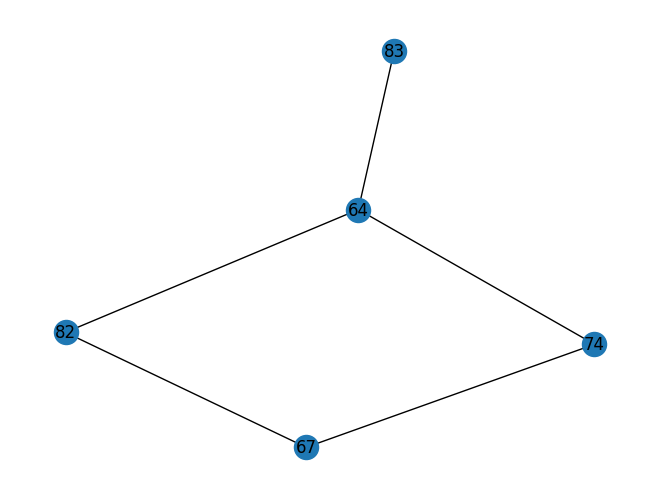

Performing node features query
Done with edge_df: 0.0008714199066162109
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  64  82     27.25   18.289527               0.319367              0.000162   
1  64  83     32.69   13.374715               0.233546              0.000251   
2  64  74     36.69    6.557693               0.102744              0.000251   
3  67  82     25.44    1.771389               0.022907              0.000015   
4  67  74     26.27   13.503222               0.211564              0.000074   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                4                       None                          None   
1                2                       None                          None   
2                2                       None                          None   
3       

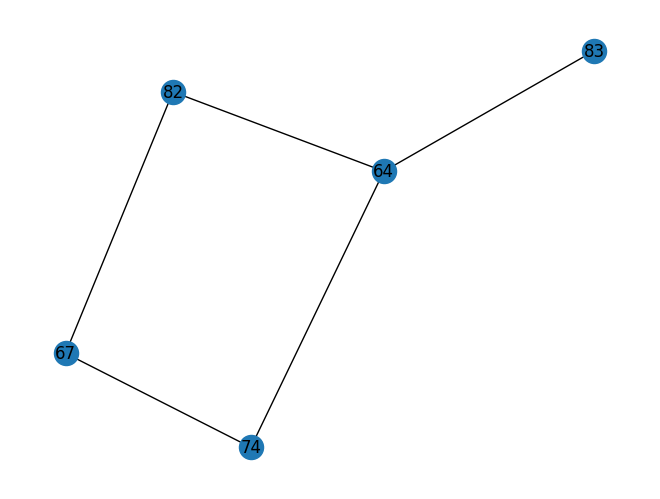

for upstream node 74, winning_node = None, error_branches = [64 67 82 83]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1652.6690887021357 but max skip distance was 1715.708392446817
Current node skip distance was 1485.6209057422263 but max skip distance was 1772.2237843326354
Current node skip distance was 1436.6213580418726 but max skip distance was 1519.4828706434616
Current node skip distance was 1915.13398897971 but max skip distance was 2300.0
Current node skip distance was 1965.5954489665883 but max skip distance was 1986.8944529111593
Current node skip distance was 1481.4901715666037 but max skip distance was 1481.4901715666037
Current node skip distance was 1428.891286875718 but max skip distance was 1905.2479460323461
Current node skip distance was 2021.6204252523048 but max skip distance was 2219.211230046629
Current node skip distance was 1758.4378551092561 but max skip distance was 2300.0
Current nod

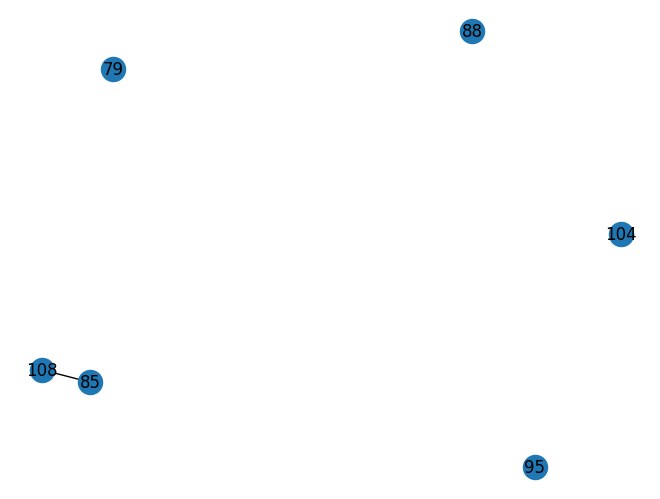

Performing global features query
Done with edge_df: 0.0008981227874755859
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   58.411022               0.381972              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       None                          None  
Afer Global query: 
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   58.411022               0.381972              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       None                          None  


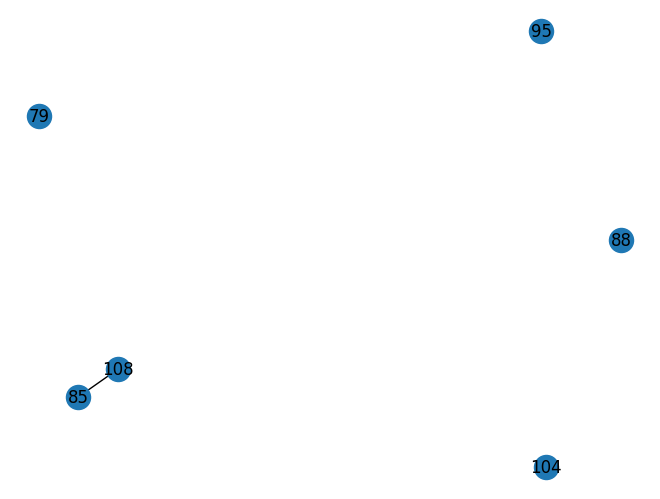

Performing node features query
Done with edge_df: 0.0009484291076660156
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   58.411022               0.381972              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                3                       None                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   58.411022               0.381972              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                3                       None                          None   

  above_threshold_delete  
0                   None  


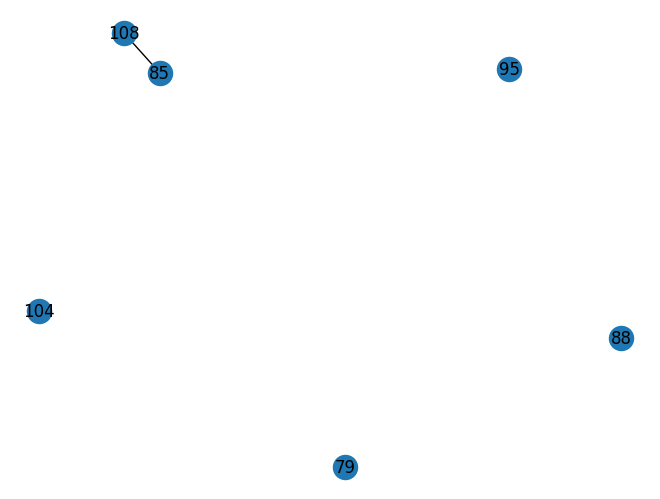

for upstream node 108, winning_node = 85, error_branches = [ 79  88  95 104]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1485.633711096742 but max skip distance was 1485.633711096742
Current node skip distance was 1451.6858475568147 but max skip distance was 1451.6858475568147
Current node skip distance was 1770.8640452267325 but max skip distance was 1803.8310592164503
Current node skip distance was 1746.5359851364037 but max skip distance was 2300.0
Current node skip distance was 1511.088544241397 but max skip distance was 1511.088544241397
Current node skip distance was 1421.315115842665 but max skip distance was 2077.6748700448725
Current node skip distance was 1960.9148168013344 but max skip distance was 1960.9148168013344
Current node skip distance was 2158.8934204224724 but max skip distance was 2158.8934204224724
Current node skip distance was 1602.8621560880745 but max skip distance was 1

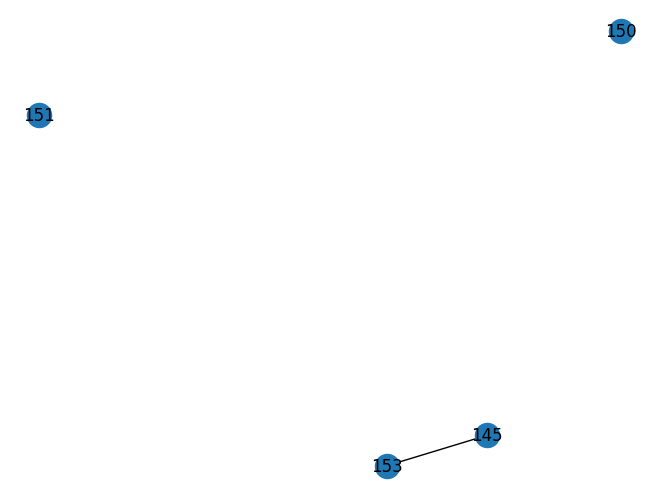

Performing global features query
Done with edge_df: 0.0007078647613525391
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175                0.39781   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175                0.39781   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete  
0                          None  


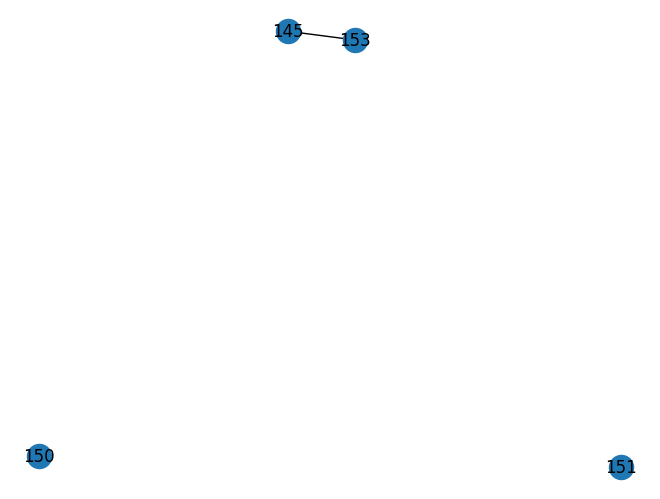

Performing node features query
Done with edge_df: 0.0008189678192138672
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175                0.39781   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175                0.39781   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


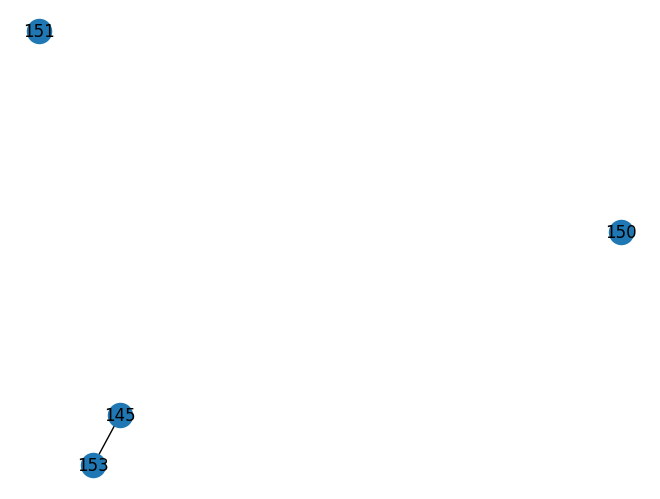

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1476.7236141240276 but max skip distance was 1805.3076234059292
Current node skip distance was 1668.5220917782256 but max skip distance was 1668.5220917782256
Current node skip distance was 1737.8365804796804 but max skip distance was 2047.7133432664607
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0011451244354248047
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   76.412563               0.886795   
1  145  153     26.01   34.278175               0.397810   
2  145  154    120.63    7.267038               0.092104   
3  150  153    102.70   42.134388               0.259161   
4 

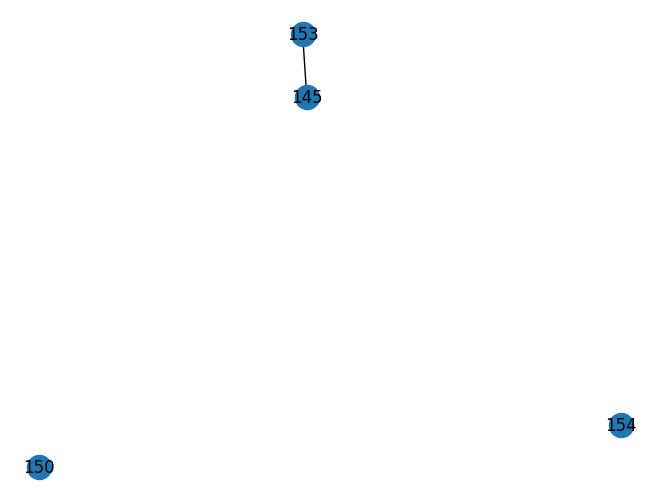

Performing global features query
Done with edge_df: 0.000728607177734375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175                0.39781   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175                0.39781   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete  
0                          None  


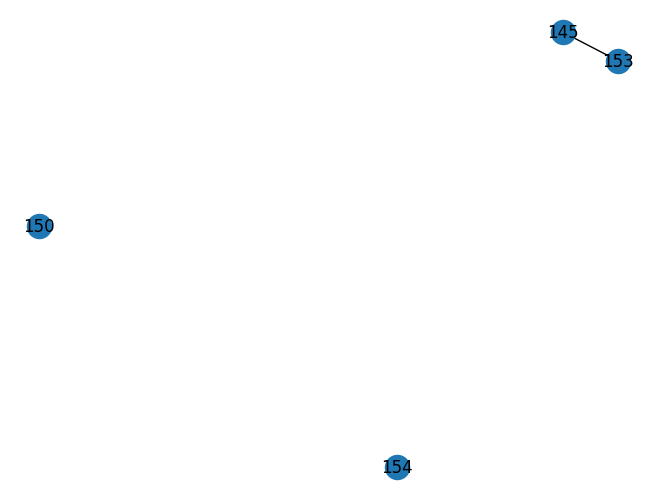

Performing node features query
Done with edge_df: 0.0007729530334472656
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175                0.39781   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   34.278175                0.39781   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


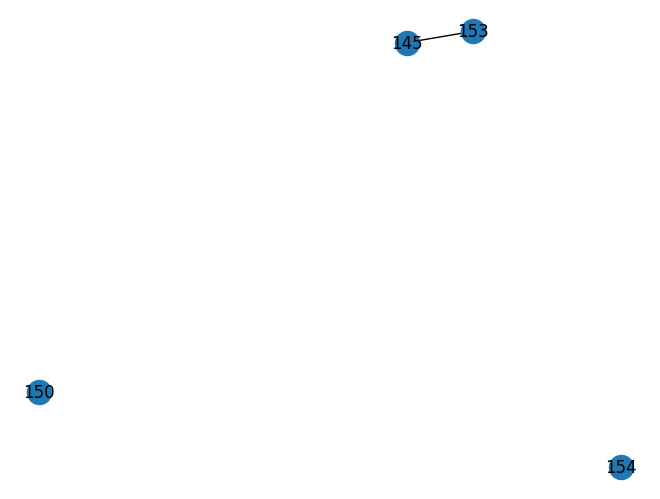

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1569.1106475805627 but max skip distance was 1569.1106475805627
Current node skip distance was 2004.6812218672449 but max skip distance was 2300.0
Current node skip distance was 1518.173059474815 but max skip distance was 1518.173059474815
Current node skip distance was 1659.209209503038 but max skip distance was 1659.209209503038
Current node skip distance was 1659.439193859838 but max skip distance was 1859.441345211907
Current node skip distance was 1471.5851631431447 but max skip distance was 1508.9514036945973
Current node skip distance was 1537.8446294301966 but max skip distance was 1916.0416955231303
Current node skip distance was 1693.3042837882767 but max skip distance was 1693.3042837882767
Current node skip distance was 1916.0416955231303 but max skip distance was 1916.0416955231303
Current node skip distance was 1505.365427265741 but max skip distance was

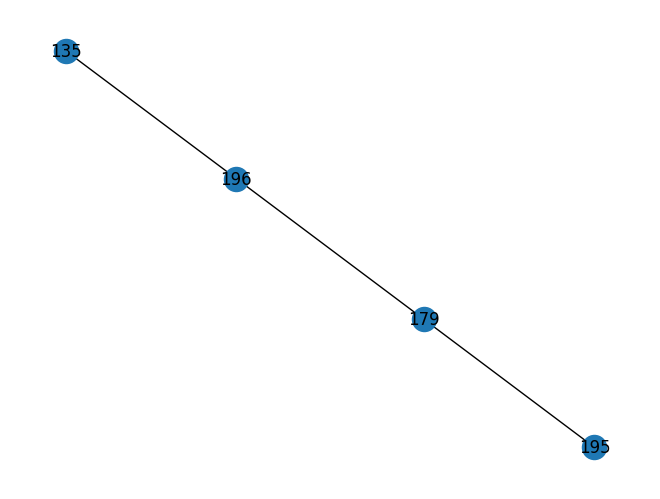

Performing global features query
Done with edge_df: 0.0008425712585449219
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   
2  196  179     64.03   12.284254               0.163567   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000079                2                      False   
1              0.000000                0                       None   
2              0.000000                0                       True   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   

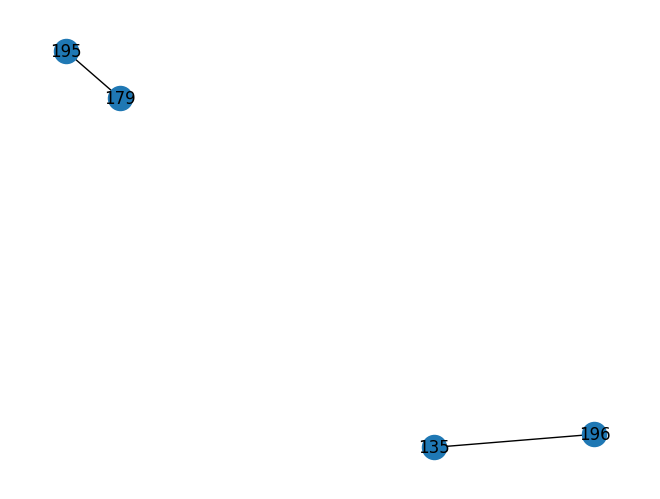

Performing node features query
Done with edge_df: 0.0008983612060546875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000079                2                      False   
1              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   

   synapse_density_diff  n_synapses_diff

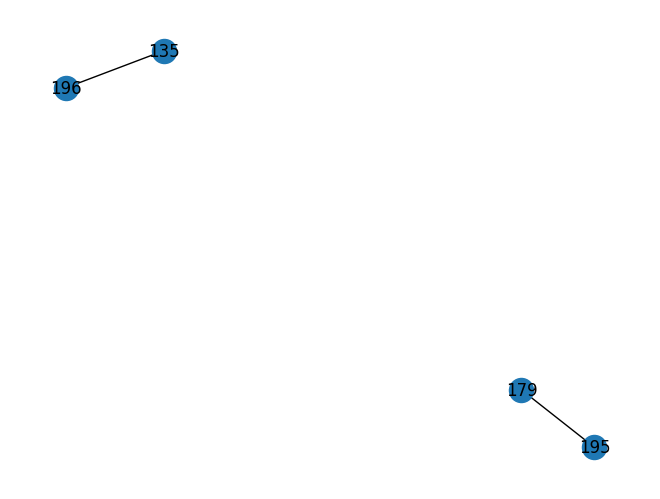

for upstream node 179, winning_node = 195, error_branches = [135 196]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (88.49933586232837) less than width_min(250)
Current node skip distance was 1469.3026492194927 but max skip distance was 1669.15941494473
Current node skip distance was 1926.1294171129227 but max skip distance was 1960.9148168013344
Current node skip distance was 2243.8316421602967 but max skip distance was 2243.8316421602967
Current node skip distance was 1562.3534987746857 but max skip distance was 1562.3534987746857
Current node skip distance was 1475.5326438941484 but max skip distance was 1475.5326438941484
Current node skip distance was 1435.7503089812697 but max skip distance was 1435.7503089812697
Current node skip distance was 1511.7277176739544 but max skip distance was 2103.191888344363
Current node skip distance was 1759.4129353208561 but max skip distance was 1759.4129353208561
Current node skip distance was 1471.4291591100111 but m

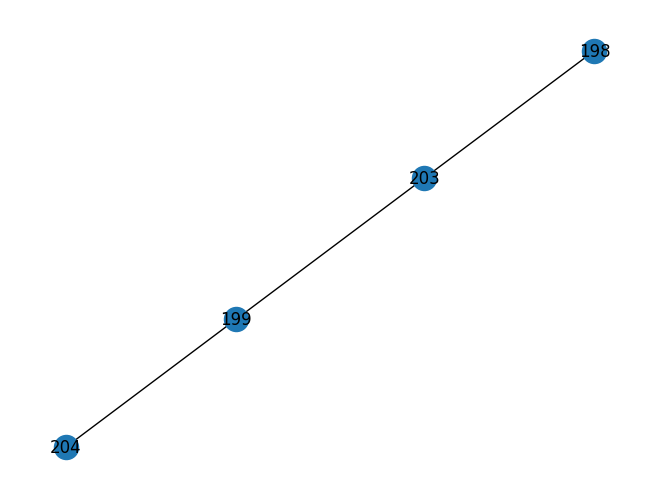

Performing global features query
Done with edge_df: 0.0008184909820556641
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.519630   
1  199  204     26.38   16.284658               0.196651   
2  199  203     59.48   80.831036               0.493954   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000086                4                       False   
1              0.000175                2                       False   
2              0.000144                1                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.51963

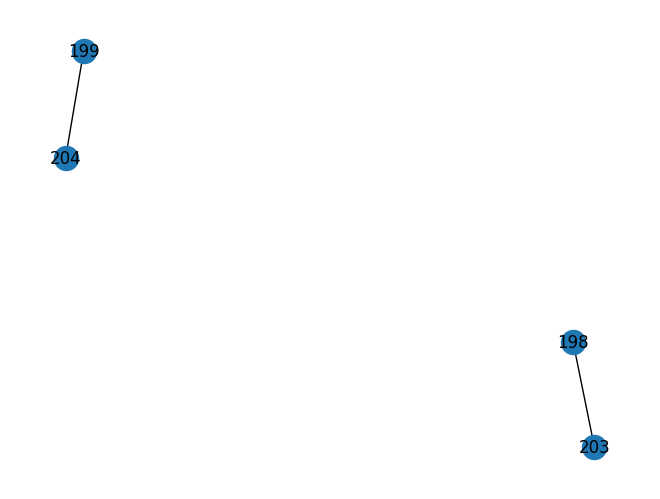

Performing node features query
Done with edge_df: 0.0008356571197509766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.519630   
1  199  204     26.38   16.284658               0.196651   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000086                4                       False   
1              0.000175                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.519630   
1  199  204     26.38   16.284658               0.196651   

   synapse_density_diff  n_synapses_d

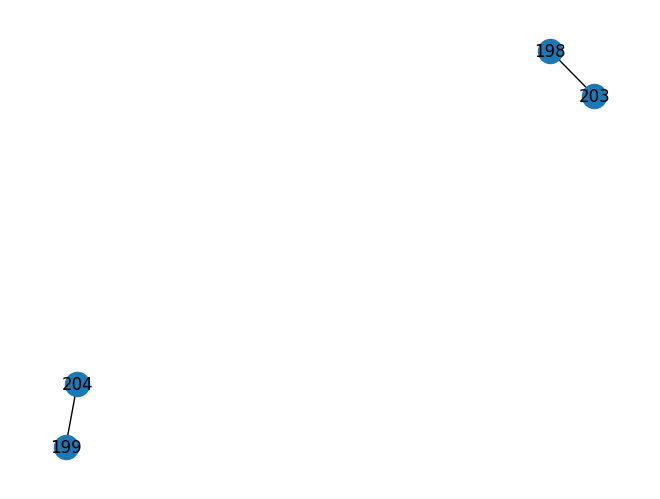

for upstream node 203, winning_node = 198, error_branches = [199 204]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (112.310866119622) less than width_min(250)
Current node skip distance was 1443.854790039841 but max skip distance was 1443.854790039841
Current node skip distance was 1506.252005449707 but max skip distance was 2300.0
Current node skip distance was 1798.2531760095058 but max skip distance was 1798.2531760095058
Current node skip distance was 1536.1693446150296 but max skip distance was 1536.1693446150296
Current node skip distance was 1780.4587744781402 but max skip distance was 1780.4587744781402
Current node skip distance was 1577.3610756221485 but max skip distance was 1577.3610756221485
Current node skip distance was 1841.6386634720473 but max skip distance was 1936.009738559324
Current node skip distance was 1992.9111177624443 but max skip distance was 1992.9111177624443
Current node skip distance was 1739.126880023306 but max skip distanc

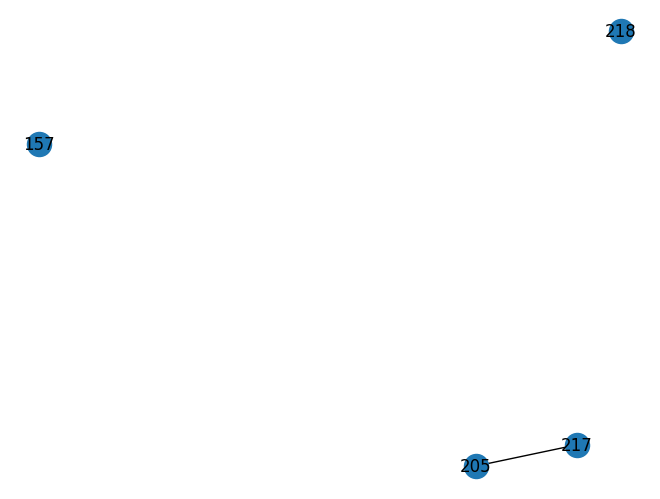

Performing global features query
Done with edge_df: 0.0009615421295166016
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete  
0                          False  


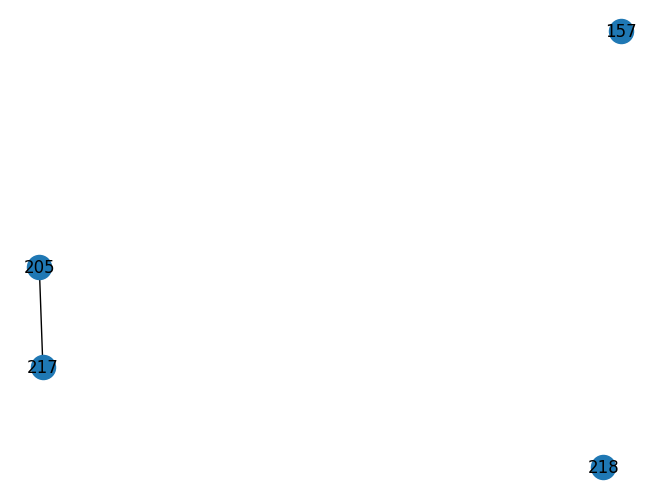

Performing node features query
Done with edge_df: 0.0007605552673339844
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


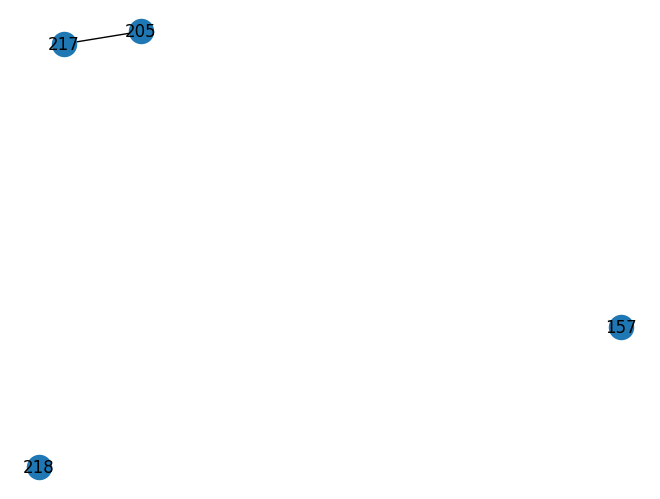

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1767.7342870501939 but max skip distance was 1848.5035166199302
Current node skip distance was 1662.4847643852409 but max skip distance was 2178.7456520482187
Current node skip distance was 1888.4086913937203 but max skip distance was 2121.7308830683824
Current node skip distance was 1800.4908031559103 but max skip distance was 1800.4908031559103
Current node skip distance was 1838.8141502467556 but max skip distance was 1838.8141502467556
Current node skip distance was 1506.2686339290442 but max skip distance was 1838.8141502467556
Current node skip distance was 1739.262976609458 but max skip distance was 1830.9796473087345
Current node skip distance was 1481.511206060329 but max skip distance was 1739.262976609458
Current node skip distance was 1591.8832581129527 but max skip distance was 1591.8832581129527
Current node skip distance was 1861.7928594977338 but max s

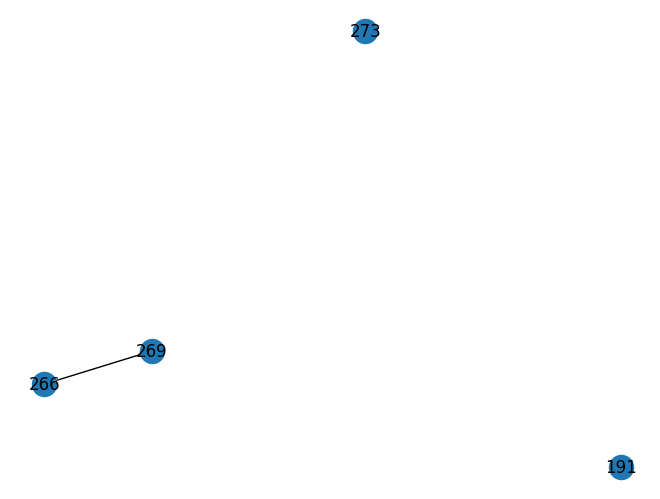

Performing global features query
Done with edge_df: 0.0008327960968017578
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete  
0                          None  


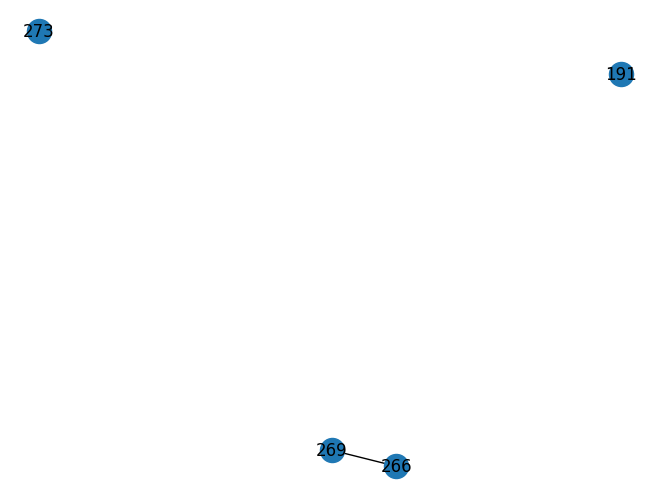

Performing node features query
Done with edge_df: 0.0008301734924316406
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


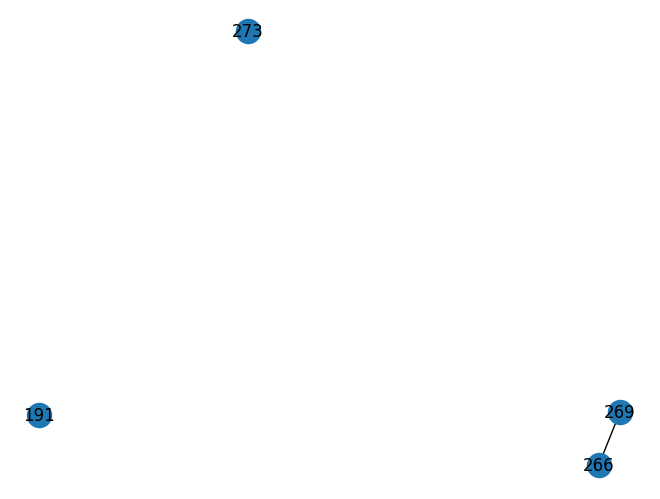

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2086.708888809626 but max skip distance was 2165.6546601796394
Current node skip distance was 2071.052502035698 but max skip distance was 2071.052502035698
Current node skip distance was 2165.6546601796394 but max skip distance was 2165.6546601796394
Current node skip distance was 1864.25330271235 but max skip distance was 1979.3255921928808
Current node skip distance was 1981.677265801626 but max skip distance was 1981.677265801626
Current node skip distance was 1745.1382455391195 but max skip distance was 2262.5388378769685
Current node skip distance was 2024.380261078134 but max skip distance was 2024.380261078134
Current node skip distance was 1670.6569985337094 but max skip distance was 1879.0664607012816
Current node skip distance was 1901.3979920419013 but max skip distance was 2024.380261078134
branch_match_query = :
(((width_diff < 75) or (width_diff_percenta

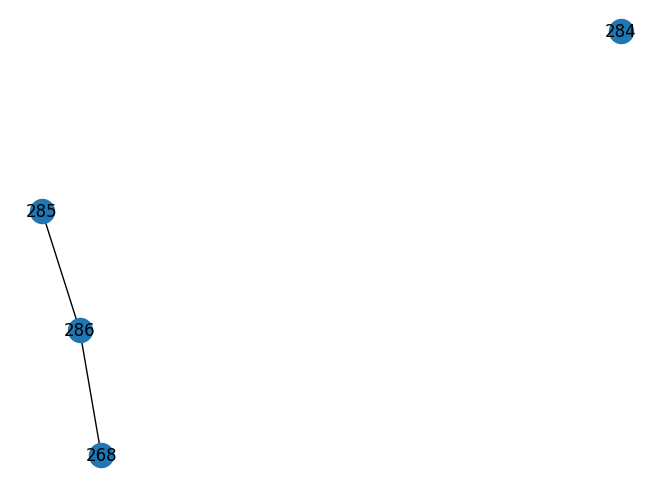

Performing global features query
Done with edge_df: 0.0010521411895751953
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  268  286     39.32  129.458250               0.554878   
1  285  286     28.94  112.351525               0.481556   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000382                4                       None   
1              0.000218                2                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  268  286     39.32  129.458250               0.554878   
1  285  286     28.94  112.351525               0.481556   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000382         

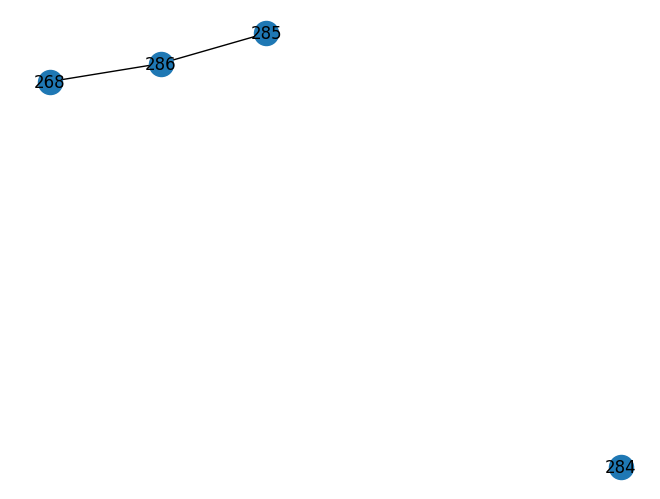

Performing node features query
Done with edge_df: 0.0007650852203369141
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  268  286     39.32  129.458250               0.554878   
1  285  286     28.94  112.351525               0.481556   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000382                4                       None   
1              0.000218                2                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  268  286     39.32  129.458250               0.554878   
1  285  286     28.94  112.351525               0.481556   

   synapse_density_diff  n_synapses_diff

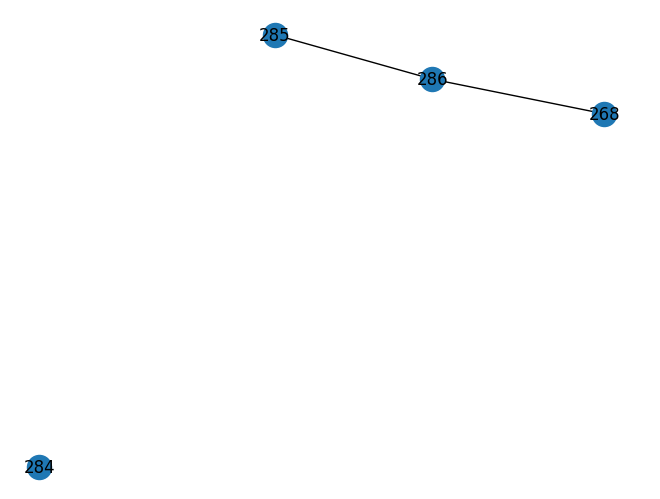

for upstream node 286, winning_node = None, error_branches = [268 284 285]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2298.921030871111 but max skip distance was 2298.921030871111
Current node skip distance was 1422.8191216850398 but max skip distance was 1422.8191216850398
Current node skip distance was 2300 but max skip distance was 2300
Current node skip distance was 1820.7231760387858 but max skip distance was 2298.921030871111
Current node skip distance was 1429.9236829418774 but max skip distance was 2300.0
Current node skip distance was 1644.9145829505464 but max skip distance was 1644.9145829505464
Current node skip distance was 1459.1445635944385 but max skip distance was 1662.3400694939558
Current node skip distance was 2041.5976191912664 but max skip distance was 2041.5976191912664
Current node skip distance was 1921.9547489008273 but max skip distance was 1921.9547489008273
Current node skip distan

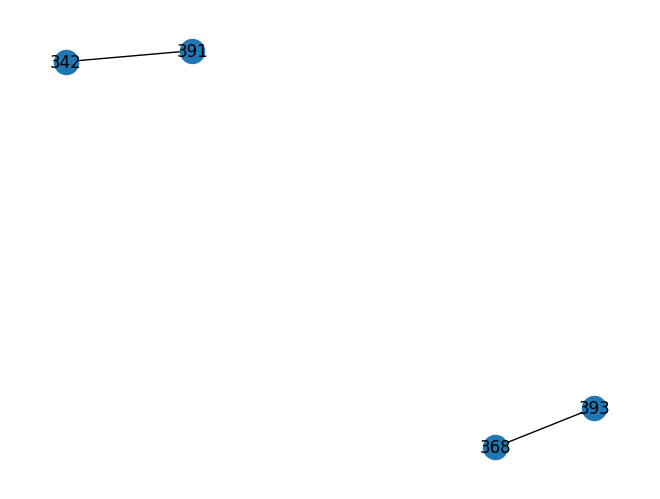

Performing global features query
Done with edge_df: 0.0007288455963134766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.114940               0.128065   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056                1                      False   
1              0.000431                2                       None   

   definite_partner_width_delete  
0                          False  
1                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.114940               0.128065   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056      

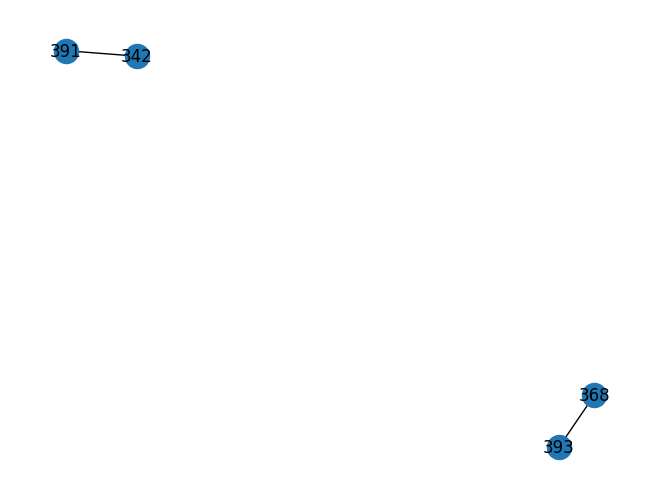

Performing node features query
Done with edge_df: 0.0009202957153320312
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.114940               0.128065   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056                1                      False   
1              0.000431                2                       None   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
1                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.114940               0.128065   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_d

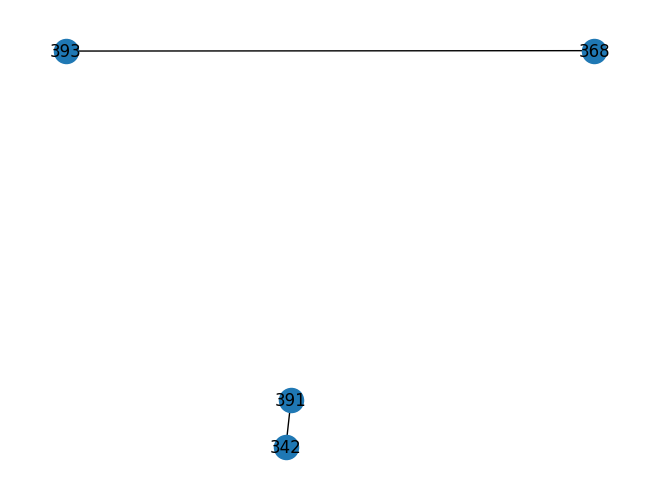

for upstream node 342, winning_node = 391, error_branches = [368 393]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (181.81578649690547) less than width_min(250)
Current node skip distance was 1857.9482625419403 but max skip distance was 1857.9482625419403
Current node skip distance was 2006.19399910225 but max skip distance was 2045.7593757531026
Current node skip distance was 1723.0631465697677 but max skip distance was 2060.1060158328014
Current node skip distance was 1827.7906452133693 but max skip distance was 2226.881251855768
Current node skip distance was 1970.0153273419096 but max skip distance was 1970.0153273419096
Current node skip distance was 1820.6045623023558 but max skip distance was 1905.8427620447305
Current node skip distance was 2000.0150089779318 but max skip distance was 2296.284725981935
Current node skip distance was 1517.477557849377 but max skip distance was 2102.4300882174084
branch_match_query = :
(((width_diff < 75) or (width_dif

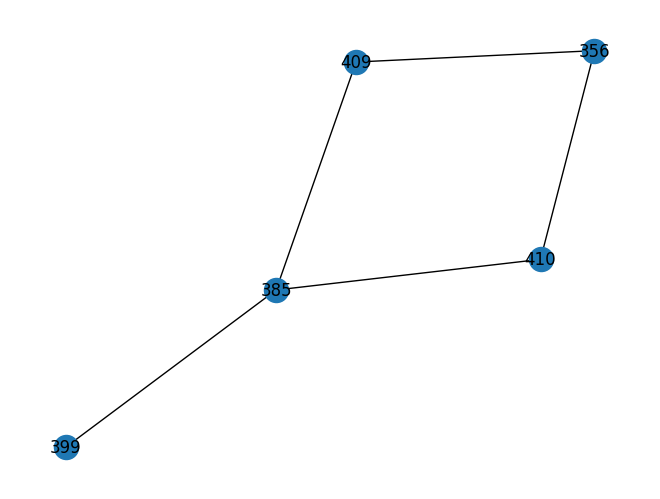

Performing global features query
Done with edge_df: 0.0009105205535888672
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  385  399     58.13   13.603553               0.216860   
1  385  409     30.64    0.065958               0.001051   
2  385  410     41.34   17.372700               0.276945   
3  409  356      8.45   21.530796               0.255727   
4  410  356     23.90    4.092138               0.048603   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000114                2                       None   
1              0.000153                3                       None   
2              0.000010                1                       None   
3              0.000137                3                       None   
4              0.000027                1                       None   

  definite_pa

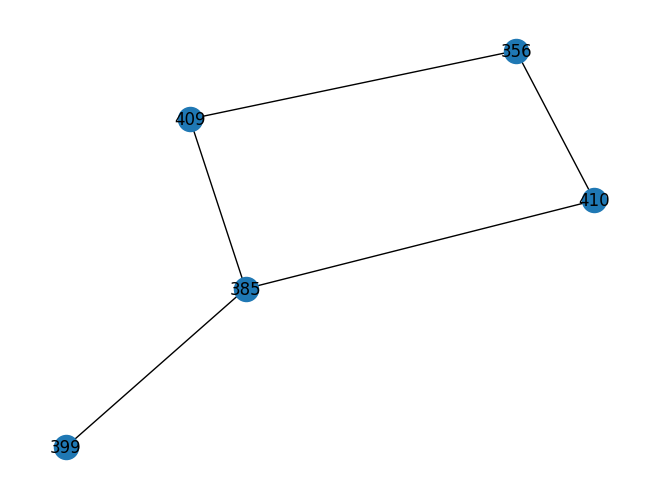

Performing node features query
Done with edge_df: 0.0008919239044189453
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  385  399     58.13   13.603553               0.216860   
1  385  409     30.64    0.065958               0.001051   
2  385  410     41.34   17.372700               0.276945   
3  409  356      8.45   21.530796               0.255727   
4  410  356     23.90    4.092138               0.048603   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000114                2                       None   
1              0.000153                3                       None   
2              0.000010                1                       None   
3              0.000137                3                       None   
4              0.000027                1                       None   

  definite_partne

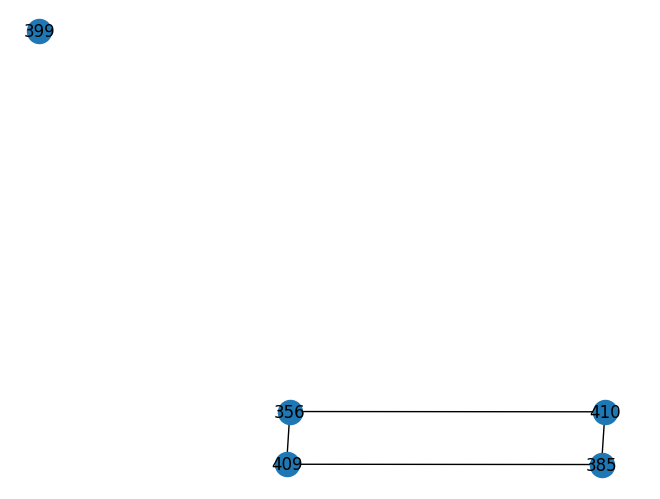

for upstream node 356, winning_node = None, error_branches = [385 399 409 410]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1406.7949617664906 but max skip distance was 1406.7949617664906
Current node skip distance was 1897.2302923052882 but max skip distance was 1897.2302923052882
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1671.9800676904256 but max skip distance was 1671.9800676904256
Current node skip distance was 1791.170407213397 but max skip distance was 2300.0
Current node skip distance was 1430.0452955758667 but max skip distance was 1430.0452955758667
Current node skip distance was 1453.4280808679287 but max skip distance was 1453.4280808679287
Current node skip distance was 1475.9217580922184 but max skip distance was 2300.0
Current node skip distance was 1873.8585886753744 but max skip distance was 1873.8585886753744
Current node skip distance w

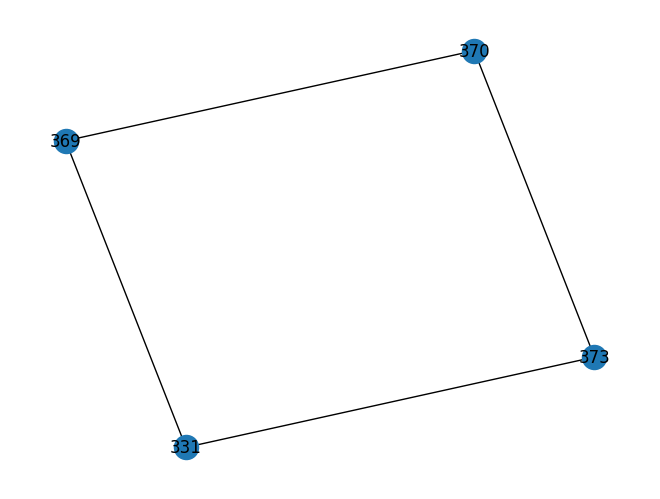

Performing global features query
Done with edge_df: 0.0009474754333496094
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  331  373     24.18   22.677958               0.225768   
1  331  369     27.75    6.976152               0.064940   
2  370  373     38.61   17.256049               0.181593   
3  370  369     24.06   12.398061               0.115412   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000015                1                       None   
1              0.000140                0                       None   
2              0.000062                1                       None   
3              0.000093                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3       

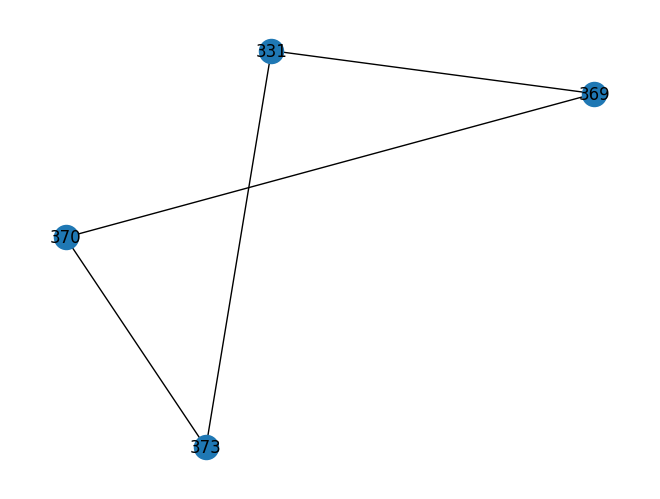

Performing node features query
Done with edge_df: 0.0009407997131347656
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  331  373     24.18   22.677958               0.225768   
1  331  369     27.75    6.976152               0.064940   
2  370  373     38.61   17.256049               0.181593   
3  370  369     24.06   12.398061               0.115412   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000015                1                       None   
1              0.000140                0                       None   
2              0.000062                1                       None   
3              0.000093                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None   

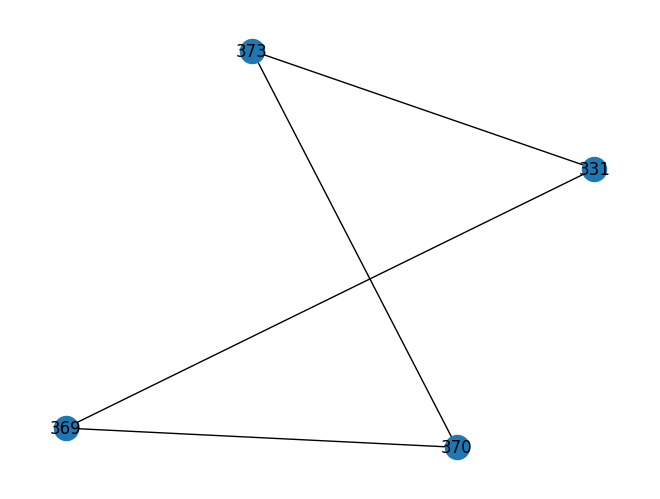

for upstream node 369, winning_node = None, error_branches = [331 370 373]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1880.691485884931 but max skip distance was 1880.691485884931
Current node skip distance was 1745.988538994956 but max skip distance was 1745.988538994956
Current node skip distance was 1490.708038892068 but max skip distance was 1543.2077566719693
Current node skip distance was 1517.6039942649368 but max skip distance was 1745.988538994956
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0011818408966064453
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  336     85.72   51.534328               0.663692   
1  332  372     78

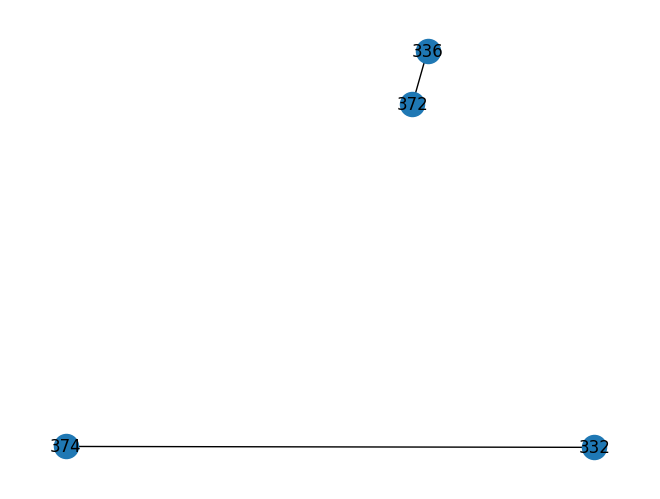

Performing global features query
Done with edge_df: 0.0008292198181152344
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24    6.576993               0.078088   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097                1                       False   
1              0.000130               10                       False   

   definite_partner_width_delete  
0                          False  
1                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24    6.576993               0.078088   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097  

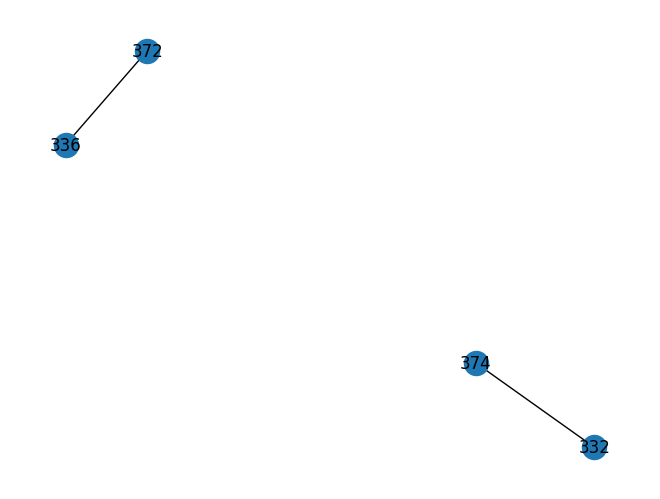

Performing node features query
Done with edge_df: 0.0008184909820556641
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24    6.576993               0.078088   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097                1                       False   
1              0.000130               10                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
1                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24    6.576993               0.078088   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapse

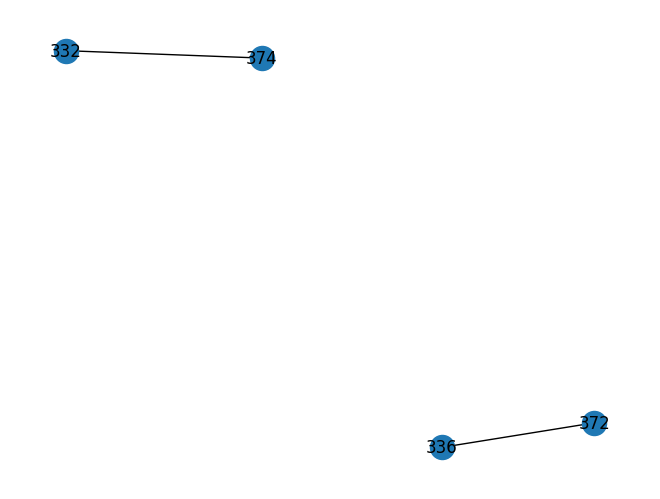

for upstream node 374, winning_node = 332, error_branches = [336 372]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (77.64796574259381) less than width_min(250)
Current node skip distance was 1824.259398723258 but max skip distance was 2221.475821813151
Current node skip distance was 2045.7593757531026 but max skip distance was 2045.7593757531026
Current node skip distance was 1932.4387404207182 but max skip distance was 1932.4387404207182
Current node skip distance was 2035.5199599493467 but max skip distance was 2035.5199599493467
Current node skip distance was 1992.5090733484935 but max skip distance was 2300.0
Current node skip distance was 1538.1542268156468 but max skip distance was 1639.417621992396
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0016224384307861328
Performing Edge Query
After edge filter, # of rows = 3
Ex

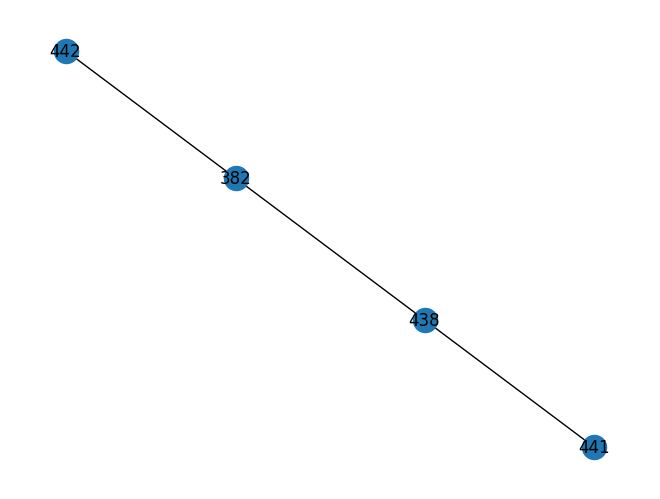

Performing global features query
Done with edge_df: 0.001125335693359375
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   
1  438  382     46.16   22.692215               0.254520   
2  442  382     25.40   24.303215               0.272589   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000070                3                      False   
1              0.000004                1                       True   
2              0.000049                3                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   


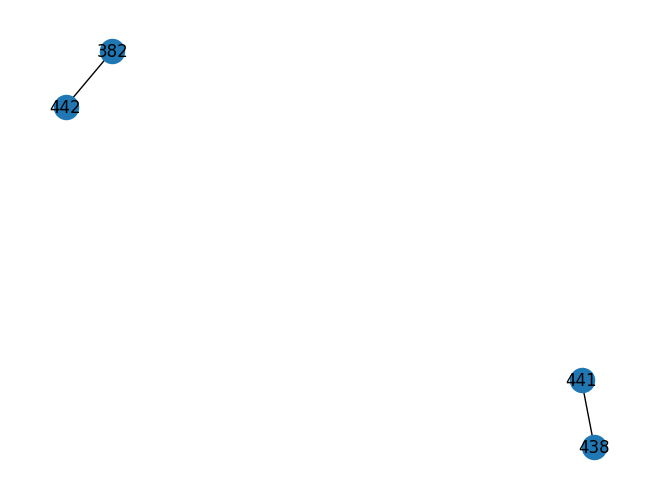

Performing node features query
Done with edge_df: 0.0009496212005615234
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   
1  442  382     25.40   24.303215               0.272589   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000070                3                      False   
1              0.000049                3                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   
1  442  382     25.40   24.303215               0.272589   

   synapse_density_diff  n_synapses_diff

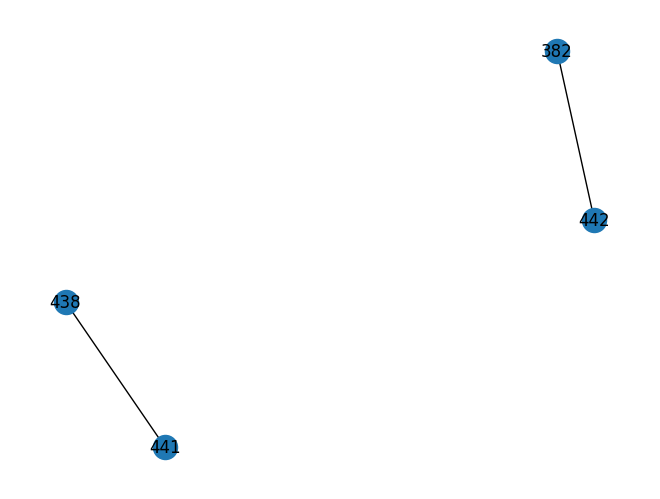

for upstream node 382, winning_node = 442, error_branches = [438 441]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (116.1121258385822) less than width_min(250)
Current node skip distance was 1543.2077566719693 but max skip distance was 1543.2077566719693
Current node skip distance was 1499.7325270056906 but max skip distance was 1499.7325270056906
Current node skip distance was 1428.0407321066473 but max skip distance was 1428.0407321066473
Current node skip distance was 1983.3865421239625 but max skip distance was 1983.3865421239625
Current node skip distance was 1906.784317756396 but max skip distance was 1906.784317756396
Current node skip distance was 1531.5349207677993 but max skip distance was 1531.5349207677993
Current node skip distance was 1924.2324437371053 but max skip distance was 1924.2324437371053
Current node skip distance was 1489.5075320461283 but max skip distance was 2228.706946366947
Current node skip distance was 1453.6175721877003 but m

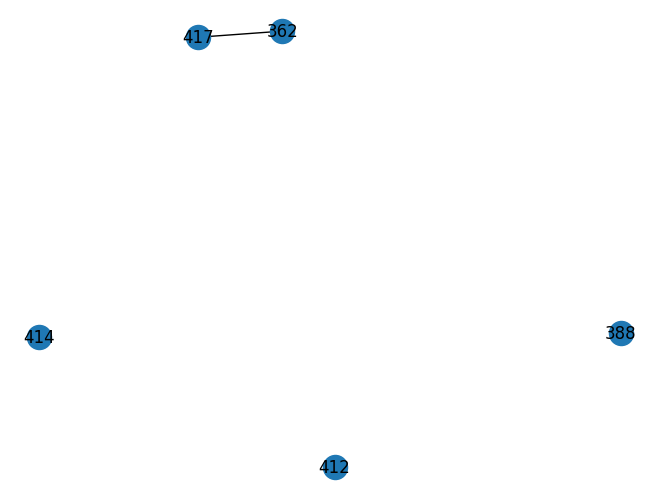

Performing global features query
Done with edge_df: 0.0007569789886474609
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete  
0                          None  


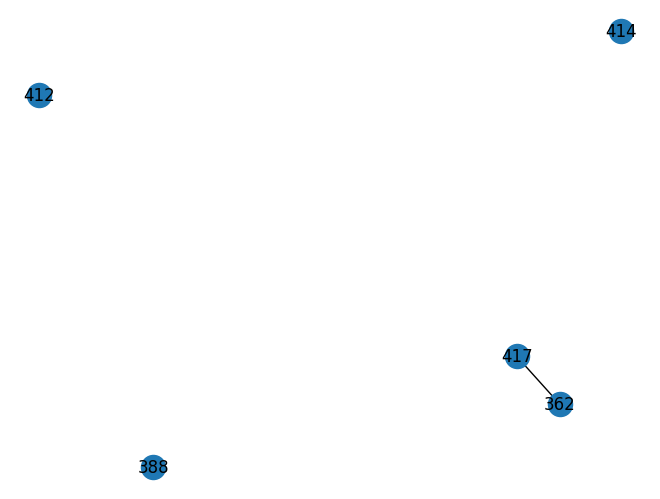

Performing node features query
Done with edge_df: 0.0007653236389160156
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


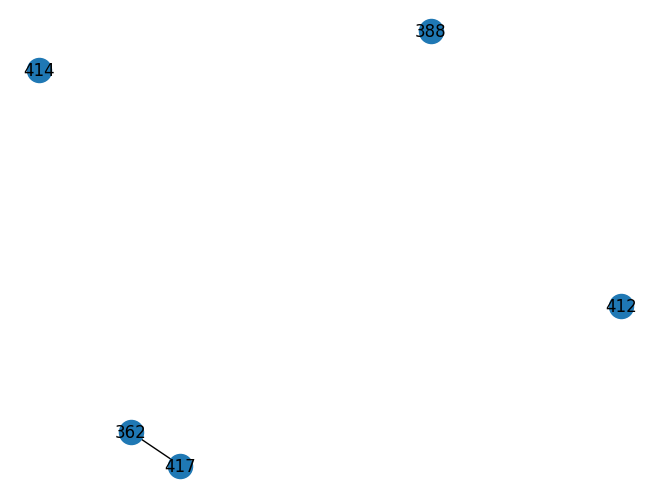

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1411.8599637600566 but max skip distance was 1493.7677241238655
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0012865066528320312
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  414    106.83    4.280608               0.067719   
1  362  417      2.53   15.293383               0.241942   
2  362  413    121.33    4.364480               0.074167   
3  414  417     75.61   19.573991               0.332155   
4  414  413    106.02    0.083872               0.001425   
5  417  413     58.41   19.657862               0.334054   

   synapse_density_diff  n_synapses_diff  
0              0.000068     

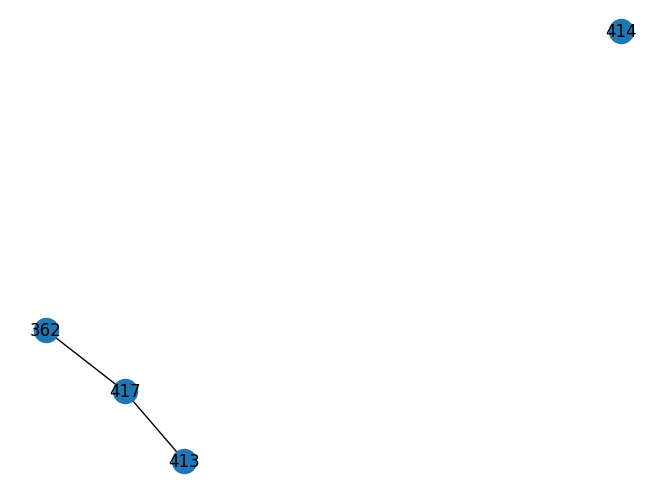

Performing global features query
Done with edge_df: 0.0007224082946777344
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   
1  417  413     58.41   19.657862               0.334054   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   
1              0.000051                1                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_part

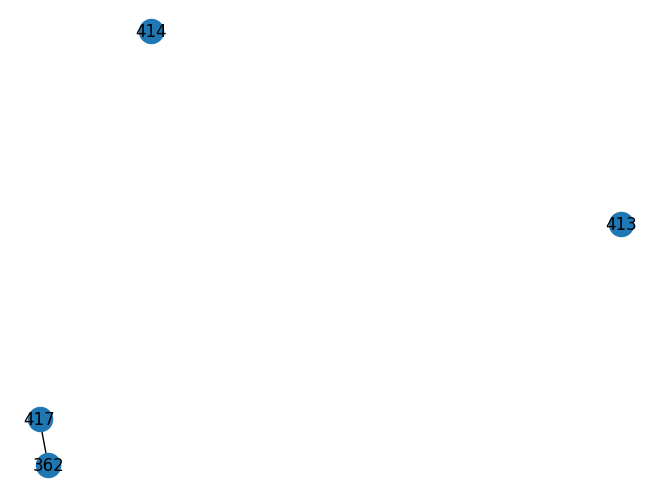

Performing node features query
Done with edge_df: 0.0007865428924560547
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


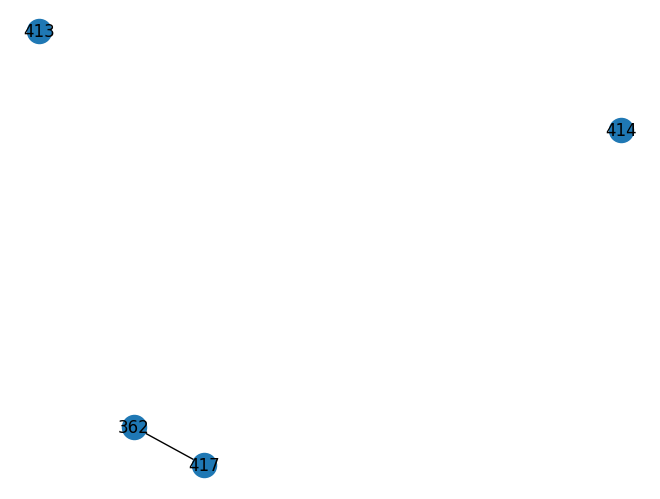

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1412.2094292764027 but max skip distance was 1655.889788657263
Current node skip distance was 2019.0862723530136 but max skip distance was 2182.663757050426
Current node skip distance was 1493.7677241238655 but max skip distance was 1493.7677241238655
Current node skip distance was 1913.6278315604623 but max skip distance was 1985.5657873414552
Current node skip distance was 1797.726209129479 but max skip distance was 2222.579722388221
Current node skip distance was 1615.3726888355557 but max skip distance was 1913.6278315604623
Current node skip distance was 1936.6802291285996 but max skip distance was 2019.0862723530136
Current node skip distance was 1543.0186166671774 but max skip distance was 1543.0186166671774
Current node skip distance was 1424.7536385843455 but max skip distance was 1424.7536385843455
Current node skip distance was 1892.3149310140766 but max sk

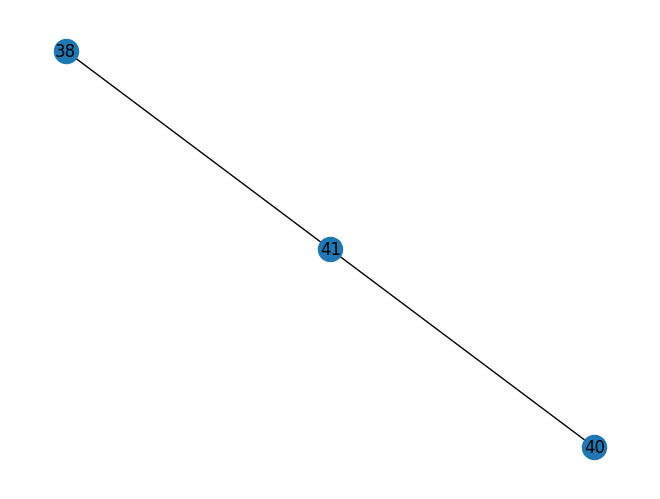

Performing global features query
Done with edge_df: 0.001094818115234375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  40  41     25.49   36.954583               0.358121              0.000240   
1  41  38     28.73   15.407457               0.188717              0.000197   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                1                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  40  41     25.49   36.954583               0.358121              0.000240   
1  41  38     28.73   15.407457               0.188717              0.000197   

   n_synapses_diff definite_partner_sk_delete definite_partner_wid

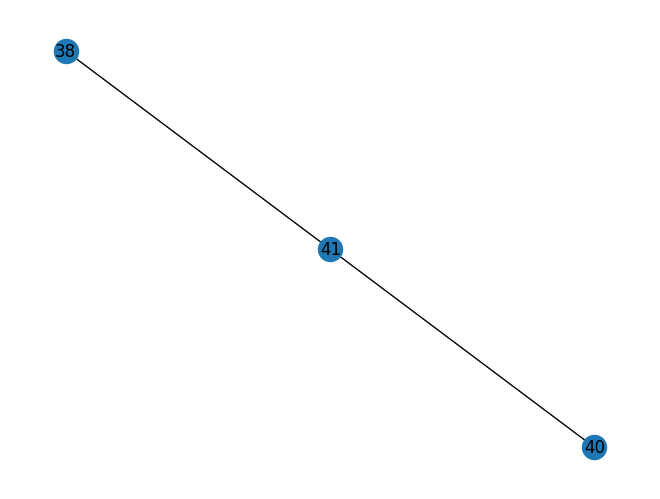

for upstream node 38, winning_node = None, error_branches = [40 41]
38 triggered axon_double_back_inh_filter
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009944438934326172
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.952810               0.240688   
1  124  128     13.82   37.023165               0.493912   
2  125  128    149.36   10.070355               0.134345   

   synapse_density_diff  n_synapses_diff  
0              0.000029                3  
1              0.000213                4  
2              0.000242                1  
Afer Local query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.952810               0.240688   
1  124  128    

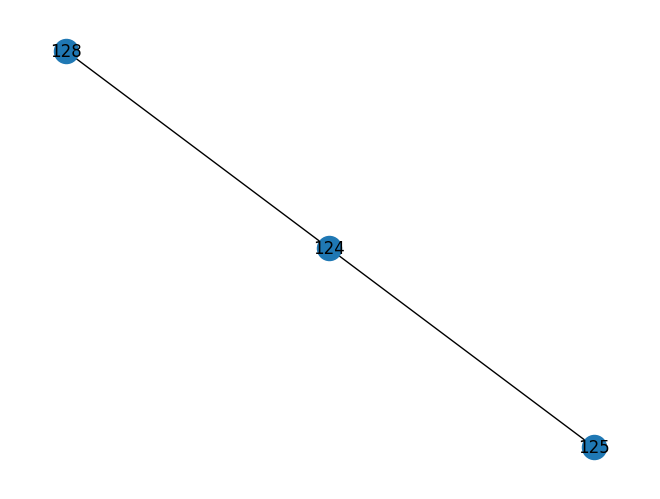

Performing global features query
Done with edge_df: 0.0009360313415527344
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.952810               0.240688   
1  124  128     13.82   37.023165               0.493912   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                3                       None   
1              0.000213                4                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.952810               0.240688   
1  124  128     13.82   37.023165               0.493912   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029         

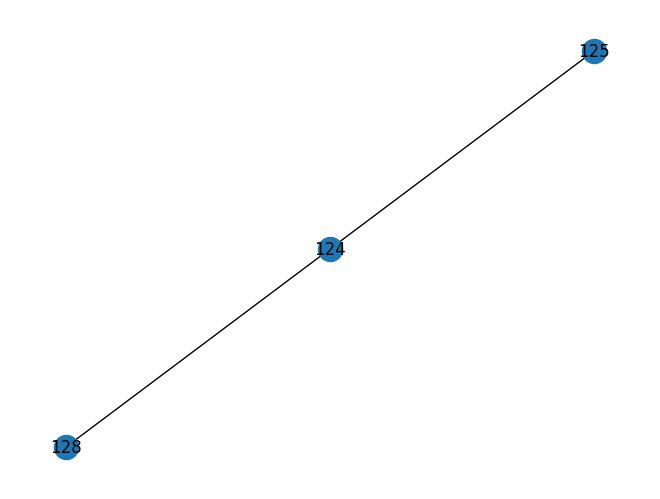

for upstream node 128, winning_node = None, error_branches = [124 125]
128 triggered axon_double_back_inh_filter
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009372234344482422
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  235  244     17.50   18.267025               0.170046   
1  235  216    146.30   58.483543               0.352507   
2  244  216     47.35   76.750569               0.462610   

   synapse_density_diff  n_synapses_diff  
0              0.000089                3  
1              0.000387                5  
2              0.000476                2  
Afer Local query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  235  244     17.50   18.267025               0.170046   
1  244  216

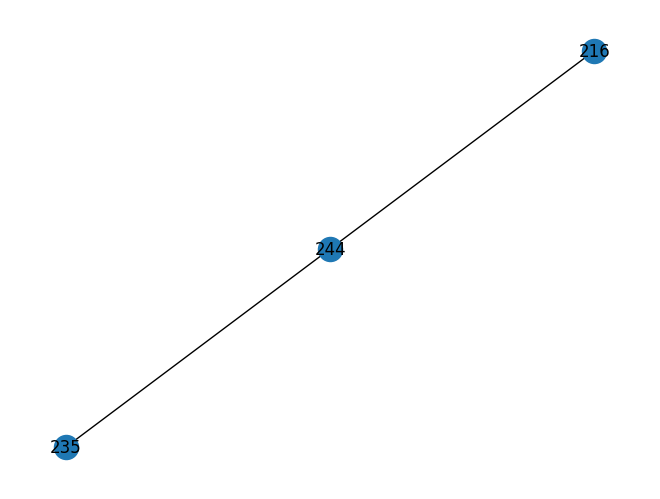

Performing global features query
Done with edge_df: 0.0009980201721191406
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  235  244     17.50   18.267025               0.170046   
1  244  216     47.35   76.750569               0.462610   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000089                3                       False   
1              0.000476                2                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  235  244      17.5   18.267025               0.170046   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000089                3                       False   

  definite_part

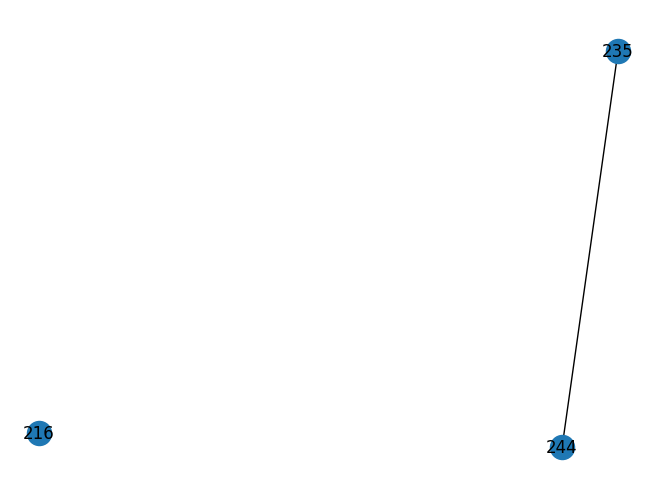

216 triggered axon_double_back_inh_filter
limb_branch_dict_to_cancel = {'L0': array([288, 289, 236, 206, 247, 250, 286, 287, 111, 130, 131, 103, 109,
       110, 113, 114, 116, 117, 120, 121, 123, 115, 118,  40,  41, 124,
       125, 235, 244])}
width_max = 500
upstream_width_max = 500
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
N_branches on limbs before simplification
L0: 264
L1: 14
L2: 15
L3: 13
L4: 11
L5: 5
L6: 1
--- STARTING merge_floating_end_nodes_to_parent----



---N_branches on limbs AFTER merge_floating_end_nodes_to_parent---
L0: 264 (difference of 0)
L1: 14 (difference of 0)
L2: 15 (difference of 0)
L3: 13 (difference of 0)
L4: 11 (difference of 0)
L5: 5 (difference of 0)
L6: 1 (difference of 0)



--- STARTING COMBINING BRANCHES----



---N_branches on limbs AFTER combine_path_branches---
L0: 260 (difference of 4)
L1: 13 (difference of 1)
L2: 15 (difference of 0)
L3: 13 (difference of 0)
L4

In [40]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [41]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)

No skeletons to stack so returning empty list
No skeletons to stack so returning empty list

Working on compartment basal---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 11.26, 'soma_angle_min': 11.26}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 6, 'soma_angle_max': 154.87, 'soma_angle_min': 26.06}


# Saving off the autoproofread neuron

In [44]:
neuron_obj_proof.neuron_graph_after_proof

In [43]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

Total time for soma meshes compression = 0.49992871284484863
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.3377950191497803
Total time for limb_meshes compression = 1.665196180343628
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 42.27595520019531
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140486237789872
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140486237789056
Total time for compression = 154.59405827522278


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964_auto_proof---


'864691135567721964_auto_proof.pbz2'

# Plotting the final neuron

In [ ]:
from neurd import synapse_utils as syu

In [ ]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [ ]:
nviz.plot_compartments(neuron_obj_proof)